#**EDA for Predicting Repeat Customer Behavior in E-Commerce**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load the Dataset ---
print("--- Step 1: Load the Dataset ---")
try:
    df = pd.read_csv('ecommerce_customer_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: ecommerce_customer_data.csv not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error appropriately if the file is missing

print("\n--- Step 1 Complete ---")

--- Step 1: Load the Dataset ---
Dataset loaded successfully.

--- Step 1 Complete ---


In [2]:
# --- Step 2: Initial Data Exploration ---
print("--- Step 2: Initial Data Exploration ---")

print("\nShape of the dataset:")
print(df.shape)

print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nColumn information and data types:")
display(df.info())

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

print("\n--- Step 2 Complete ---")

--- Step 2: Initial Data Exploration ---

Shape of the dataset:
(10000, 23)

First 5 rows of the dataset:


,CustomerID,RegistrationDate,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,SocialMediaEngagementRate,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems
0,NaN,2020-05-10,25.0,NaN,NaN,Other,Tokyo,4.0,15.886509,NaN,...,0.379694,High,0.0,6.240881,0.112955,0.239948,0.156776,Yes,Yes,No
1,CUST00002,2021-07-18,NaN,Prefer not to say,High,Germany,London,6.0,27.638853,181.725056,...,0.140988,Low,0.0,7.721917,0.300979,0.230821,0.290735,Yes,No,No
2,CUST00003,2021-02-04,43.0,NaN,High,France,NaN,10.0,161.739425,1810.555150,...,0.323660,Low,0.0,7.899042,NaN,0.132239,0.050505,Yes,No,Yes
3,CUST00004,2020-12-31,49.0,Female,High,Australia,Los Angeles,5.0,14.194263,86.219740,...,0.268428,Never,1.0,7.829459,0.074097,0.206644,0.281067,Yes,Yes,No
4,CUST00005,2022-06-27,29.0,Female,Very High,Australia,Tokyo,7.0,31147.427206,2112.575945,...,0.160427,High,NaN,7.777353,0.163438,0.232410,0.326645,Yes,No,No



Column information and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   9508 non-null   object 
 1   RegistrationDate             9504 non-null   object 
 2   Age                          9485 non-null   float64
 3   Gender                       7388 non-null   object 
 4   IncomeLevel                  7497 non-null   object 
 5   Country                      9507 non-null   object 
 6   City                         9517 non-null   object 
 7   TotalPurchases               9470 non-null   float64
 8   AverageOrderValue            9481 non-null   float64
 9   CustomerLifetimeValue        9507 non-null   float64
 10  FavoriteCategory             8411 non-null   object 
 11  SecondFavoriteCategory       8450 non-null   object 
 12  EmailEngagementRate          9524 non-n

None


Descriptive statistics for numerical columns:


,Age,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,EmailEngagementRate,SocialMediaEngagementRate,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate
count,9485.000000,9470.000000,9481.000000,9507.000000,9524.000000,9472.000000,9482.000000,9504.000000,9477.000000,9506.000000,9495.000000
mean,34.536742,5.044773,189.224562,672.919948,0.282649,0.286632,2.001793,6.955430,0.198026,0.198721,0.199427
std,15.117146,3.205844,1472.277418,5729.439186,0.157996,0.159938,1.422949,1.894267,0.120243,0.119426,0.120992
min,-25.000000,0.000000,1.235282,-9331.077011,0.002205,0.002378,0.000000,0.000000,0.000885,0.001554,0.002951
25%,24.000000,3.000000,27.441273,95.662915,0.160170,0.161669,1.000000,5.670156,0.106547,0.106324,0.106656
50%,35.000000,5.000000,54.532801,248.018238,0.260164,0.266130,2.000000,7.008513,0.176639,0.178118,0.177495
75%,45.000000,7.000000,109.260008,545.787253,0.384726,0.389884,3.000000,8.365637,0.268938,0.271487,0.273069
max,91.000000,27.000000,51810.123750,420810.815641,0.890822,0.847513,11.000000,10.000000,0.783003,0.824266,0.784076



--- Step 2 Complete ---


In [3]:
# --- Step 3: Check for Missing Values ---
print("--- Step 3: Check for Missing Values ---")

print("\nMissing values per column:")
display(df.isnull().sum())

print("\n--- Step 3 Complete ---")

--- Step 3: Check for Missing Values ---

Missing values per column:


,0
CustomerID,492
RegistrationDate,496
Age,515
Gender,2612
IncomeLevel,2503
Country,493
City,483
TotalPurchases,530
AverageOrderValue,519
CustomerLifetimeValue,493



--- Step 3 Complete ---


--- Step 4: EDA: Visualize Missing Values (Heatmap) ---

Visualizing missing values with a heatmap:


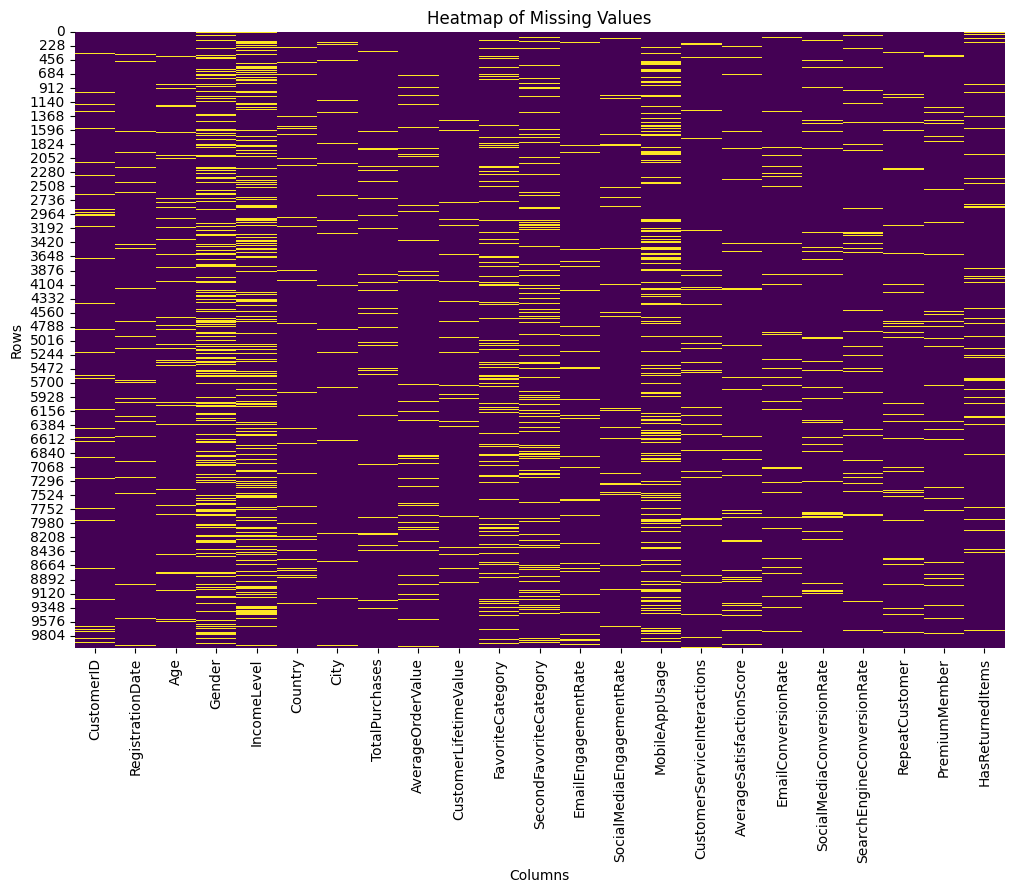


--- Step 4 Complete ---


In [4]:
# --- Step 4: EDA: Visualize Missing Values (Heatmap) ---
print("--- Step 4: EDA: Visualize Missing Values (Heatmap) ---")

print("\nVisualizing missing values with a heatmap:")

# Create a boolean DataFrame indicating missing values
missing_data = df.isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis') # cmap can be adjusted
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

print("\n--- Step 4 Complete ---")

In [5]:
# --- Step 5: Check for Duplicate Records ---
print("--- Step 5: Check for Duplicate Records ---")

duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print("Note: Duplicate rows found. These will be handled in the preprocessing step.")
else:
    print("No duplicate rows found.")

print("\n--- Step 5 Complete ---")

--- Step 5: Check for Duplicate Records ---

Number of duplicate rows: 0
No duplicate rows found.

--- Step 5 Complete ---


In [6]:
# --- Step 6: Check for Constant/Near-Constant Columns ---
print("--- Step 6: Check for Constant/Near-Constant Columns ---")

print("\nChecking for columns with constant or near-constant values:")
cols_to_potentially_drop_constant = []
for col in df.columns:
    if df[col].nunique() <= 1:
        print(f"Column '{col}' has constant value. Unique values: {df[col].unique()}")
        cols_to_potentially_drop_constant.append(col)
    # Optional: Add check for near-constant categorical columns (e.g., less than 1% unique values)
    # elif df[col].dtype == 'object' and df[col].nunique() / len(df) < 0.01:
    #      print(f"Column '{col}' is near-constant categorical. Unique values: {df[col].unique()[:5]}...")


if not cols_to_potentially_drop_constant:
    print("No columns with constant values found.")
else:
    print("\nNote: Columns with constant values will be reviewed for potential removal during preprocessing.")

print("\n--- Step 6 Complete ---")

--- Step 6: Check for Constant/Near-Constant Columns ---

Checking for columns with constant or near-constant values:
No columns with constant values found.

--- Step 6 Complete ---


In [7]:
# --- Step 7: Check Target Variable Balance ---
print("--- Step 7: Check Target Variable Balance ---")

# Use the correct column name 'Repeat Customer'
target_original_col = 'Repeat Customer'

if target_original_col in df.columns:
    print(f"\nDistribution of {target_original_col}:")
    print(df[target_original_col].value_counts())
    print(f"\nDistribution of {target_original_col} (Percentage):")
    print(df[target_original_col].value_counts(normalize=True) * 100)

    # Visualize the distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_original_col, data=df, palette='viridis')
    plt.title(f'Distribution of {target_original_col}')
    plt.xlabel('Repeat Customer')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Error: Target column '{target_original_col}' not found in DataFrame for balance check.")

print("\n--- Step 7 Complete ---")

--- Step 7: Check Target Variable Balance ---
Error: Target column 'Repeat Customer' not found in DataFrame for balance check.

--- Step 7 Complete ---


In [8]:
# --- Step 8: Handle Obvious Outliers/Inconsistencies (Negative Values) ---
print("--- Step 8: Handle Obvious Outliers/Inconsistencies (Negative Values) ---")

# Handle obvious outliers/inconsistencies (Negative values in Age and CLTV)
print("Handling obvious outliers (negative Age and CustomerLifetimeValue)...")
for col in ['Age', 'CustomerLifetimeValue']:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"Replacing {negative_count} negative values in '{col}' with NaN.")
            df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)
        else:
             print(f"No negative values found in '{col}'.")
    else:
        print(f"Warning: Column '{col}' not found. Skipping negative value handling.")

print("\n--- Step 8 Complete ---")

--- Step 8: Handle Obvious Outliers/Inconsistencies (Negative Values) ---
Handling obvious outliers (negative Age and CustomerLifetimeValue)...
Replacing 89 negative values in 'Age' with NaN.
Replacing 936 negative values in 'CustomerLifetimeValue' with NaN.

--- Step 8 Complete ---


In [9]:
# --- Step 9: Create Feature: Customer Tenure ---
print("--- Step 9: Create Feature: Customer Tenure ---")

# Create CustomerTenureDays feature from RegistrationDate
print("\nCreating 'CustomerTenureDays' feature...")
if 'RegistrationDate' in df.columns:
    # Ensure RegistrationDate is datetime, coercing errors will turn invalid dates into NaT (NaN for datetime)
    df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'], errors='coerce')

    # Use the latest date in the dataset + 1 day as a proxy for "today" for consistency
    latest_date = df['RegistrationDate'].max()
    if pd.notnull(latest_date):
         df['CustomerTenureDays'] = (latest_date + pd.Timedelta(days=1) - df['RegistrationDate']).dt.days
         print("'CustomerTenureDays' created based on latest registration date.")
    else:
        # Fallback to pd.to_datetime('today') if no valid dates found, but warn
        print("Warning: No valid Registration Dates found. Calculating 'CustomerTenureDays' based on current date.")
        df['CustomerTenureDays'] = (pd.to_datetime('today') - df['RegistrationDate']).dt.days

    # Check for any NaNs created if RegistrationDate had invalid entries
    if df['CustomerTenureDays'].isnull().sum() > 0:
        print(f"Warning: {df['CustomerTenureDays'].isnull().sum()} NaN values created in 'CustomerTenureDays' due to invalid RegistrationDate.")

else:
    print("Warning: 'RegistrationDate' column not found. Cannot create 'CustomerTenureDays'.")

print("\n--- Step 9 Complete ---")

--- Step 9: Create Feature: Customer Tenure ---

Creating 'CustomerTenureDays' feature...
'CustomerTenureDays' created based on latest registration date.

--- Step 9 Complete ---


In [10]:
# --- Step 10: Identify Columns for Imputation ---
print("--- Step 10: Identify Columns for Imputation ---")

# Identify numerical columns for imputation
# Exclude identifier columns like CustomerID if it still exists
numerical_cols_for_imputation = df.select_dtypes(include=np.number).columns.tolist()
if 'CustomerID' in numerical_cols_for_imputation:
    numerical_cols_for_imputation.remove('CustomerID')

# Identify categorical columns for imputation
# These are typically object type columns. We will handle binary conversions later.
categorical_cols_for_imputation = df.select_dtypes(include='object').columns.tolist()

# Exclude the original target column ('Repeat Customer') if it has no missing values
# Based on Step 3/7, 'Repeat Customer' has no missing values, so it won't be in the imputation list anyway.
target_original_col = 'Repeat Customer'
if target_original_col in categorical_cols_for_imputation:
     categorical_cols_for_imputation.remove(target_original_col)


print("\nNumerical columns identified for imputation:")
print(numerical_cols_for_imputation)

print("\nCategorical columns identified for imputation:")
print(categorical_cols_for_imputation)


print("\n--- Step 10 Complete ---")

--- Step 10: Identify Columns for Imputation ---

Numerical columns identified for imputation:
['Age', 'TotalPurchases', 'AverageOrderValue', 'CustomerLifetimeValue', 'EmailEngagementRate', 'SocialMediaEngagementRate', 'CustomerServiceInteractions', 'AverageSatisfactionScore', 'EmailConversionRate', 'SocialMediaConversionRate', 'SearchEngineConversionRate', 'CustomerTenureDays']

Categorical columns identified for imputation:
['CustomerID', 'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory', 'SecondFavoriteCategory', 'MobileAppUsage', 'RepeatCustomer', 'PremiumMember', 'HasReturnedItems']

--- Step 10 Complete ---


In [11]:
# --- Step 11: Handle Missing Values - Numerical Imputation (Median) ---
print("--- Step 11: Handle Missing Values - Numerical Imputation (Median) ---")

# Impute numerical NaNs with median
print("\nImputing numerical missing values with median...")

# Ensure the list of numerical columns for imputation is up-to-date
numerical_cols_for_imputation = df.select_dtypes(include=np.number).columns.tolist()
if 'CustomerID' in numerical_cols_for_imputation:
    numerical_cols_for_imputation.remove('CustomerID')
# Also include the newly created 'CustomerTenureDays' if it has NaNs from invalid dates (Step 9)
if 'CustomerTenureDays' in df.columns and 'CustomerTenureDays' not in numerical_cols_for_imputation:
     if df['CustomerTenureDays'].isnull().sum() > 0:
          print("Including 'CustomerTenureDays' for numerical imputation due to NaNs.")
          numerical_cols_for_imputation.append('CustomerTenureDays')


print("Numerical columns identified for imputation:", numerical_cols_for_imputation)


for col in numerical_cols_for_imputation:
    if col in df.columns: # Ensure column exists before processing
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputed missing values in numerical column '{col}' with median ({median_val}).")
        else:
             print(f"No missing values found in numerical column '{col}'. Skipping imputation.")
    else:
        print(f"Warning: Numerical imputation column '{col}' not found in DataFrame. Skipping imputation.")


print("\nMissing values after numerical imputation:")
display(df.isnull().sum())


print("\n--- Step 11 Complete ---")

--- Step 11: Handle Missing Values - Numerical Imputation (Median) ---

Imputing numerical missing values with median...
Numerical columns identified for imputation: ['Age', 'TotalPurchases', 'AverageOrderValue', 'CustomerLifetimeValue', 'EmailEngagementRate', 'SocialMediaEngagementRate', 'CustomerServiceInteractions', 'AverageSatisfactionScore', 'EmailConversionRate', 'SocialMediaConversionRate', 'SearchEngineConversionRate', 'CustomerTenureDays']
Imputed missing values in numerical column 'Age' with median (35.0).
Imputed missing values in numerical column 'TotalPurchases' with median (5.0).
Imputed missing values in numerical column 'AverageOrderValue' with median (54.53280105391683).
Imputed missing values in numerical column 'CustomerLifetimeValue' with median (288.7110403087488).
Imputed missing values in numerical column 'EmailEngagementRate' with median (0.2601637071792573).
Imputed missing values in numerical column 'SocialMediaEngagementRate' with median (0.2661298571516564).

/tmp/ipython-input-11-4004858481.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


,0
CustomerID,492
RegistrationDate,496
Age,0
Gender,2612
IncomeLevel,2503
Country,493
City,483
TotalPurchases,0
AverageOrderValue,0
CustomerLifetimeValue,0



--- Step 11 Complete ---


In [12]:
# --- Step 12: Handle Missing Values - Categorical Imputation (Mode / 'None') ---
print("--- Step 12: Handle Missing Values - Categorical Imputation (Mode / 'None') ---")

# Impute categorical NaNs with mode or 'None'
print("\nImputing categorical missing values with mode or 'None'...")

# Ensure the list of categorical columns for imputation is up-to-date
# These are typically object type columns that were not dropped yet
categorical_cols_for_imputation = df.select_dtypes(include='object').columns.tolist()

# Exclude the original target column ('Repeat Customer') if it has no missing values
# Based on Step 3/7, 'Repeat Customer' has no missing values, so it won't be in the imputation list anyway.
target_original_col = 'Repeat Customer'
if target_original_col in categorical_cols_for_imputation:
     categorical_cols_for_imputation.remove(target_original_col)


print("Categorical columns identified for imputation:", categorical_cols_for_imputation)


for col in categorical_cols_for_imputation:
    if col in df.columns: # Check column exists before processing
        if df[col].isnull().sum() > 0:
            print(f"Missing values found in categorical column '{col}'. Attempting imputation.")
            if col == 'Second Favorite Category': # Use correct column name
                 # Missing might indicate no second favorite
                 df[col].fillna('None', inplace=True)
                 print(f"Imputed missing values in '{col}' with 'None'.")
            else:
                # Handle case where mode might be empty (e.g., all NaNs or very few values)
                if not df[col].mode().empty:
                    mode_val = df[col].mode()[0]
                    df[col].fillna(mode_val, inplace=True)
                    print(f"Imputed missing values in '{col}' with mode ({mode_val}).")
                else:
                     print(f"Warning: Could not calculate mode for '{col}'. Skipping imputation for this column.")
        else:
             print(f"No missing values found in categorical column '{col}'. Skipping imputation.")
    else:
        print(f"Warning: Categorical imputation column '{col}' not found in DataFrame. Skipping imputation.")


print("\nMissing values after categorical imputation:")
display(df.isnull().sum())

print("\n--- Step 12 Complete ---")

--- Step 12: Handle Missing Values - Categorical Imputation (Mode / 'None') ---

Imputing categorical missing values with mode or 'None'...
Categorical columns identified for imputation: ['CustomerID', 'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory', 'SecondFavoriteCategory', 'MobileAppUsage', 'RepeatCustomer', 'PremiumMember', 'HasReturnedItems']
Missing values found in categorical column 'CustomerID'. Attempting imputation.
Imputed missing values in 'CustomerID' with mode (CUST00002).
Missing values found in categorical column 'Gender'. Attempting imputation.
Imputed missing values in 'Gender' with mode (Other).
Missing values found in categorical column 'IncomeLevel'. Attempting imputation.
Imputed missing values in 'IncomeLevel' with mode (Very High).
Missing values found in categorical column 'Country'. Attempting imputation.
Imputed missing values in 'Country' with mode (France).
Missing values found in categorical column 'City'. Attempting imputation.
Imputed miss

/tmp/ipython-input-12-504283678.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


,0
CustomerID,0
RegistrationDate,496
Age,0
Gender,0
IncomeLevel,0
Country,0
City,0
TotalPurchases,0
AverageOrderValue,0
CustomerLifetimeValue,0



--- Step 12 Complete ---


--- Step 13: EDA: Univariate Visualizations (Histograms & Countplots) ---

Plotting histograms for numerical features...


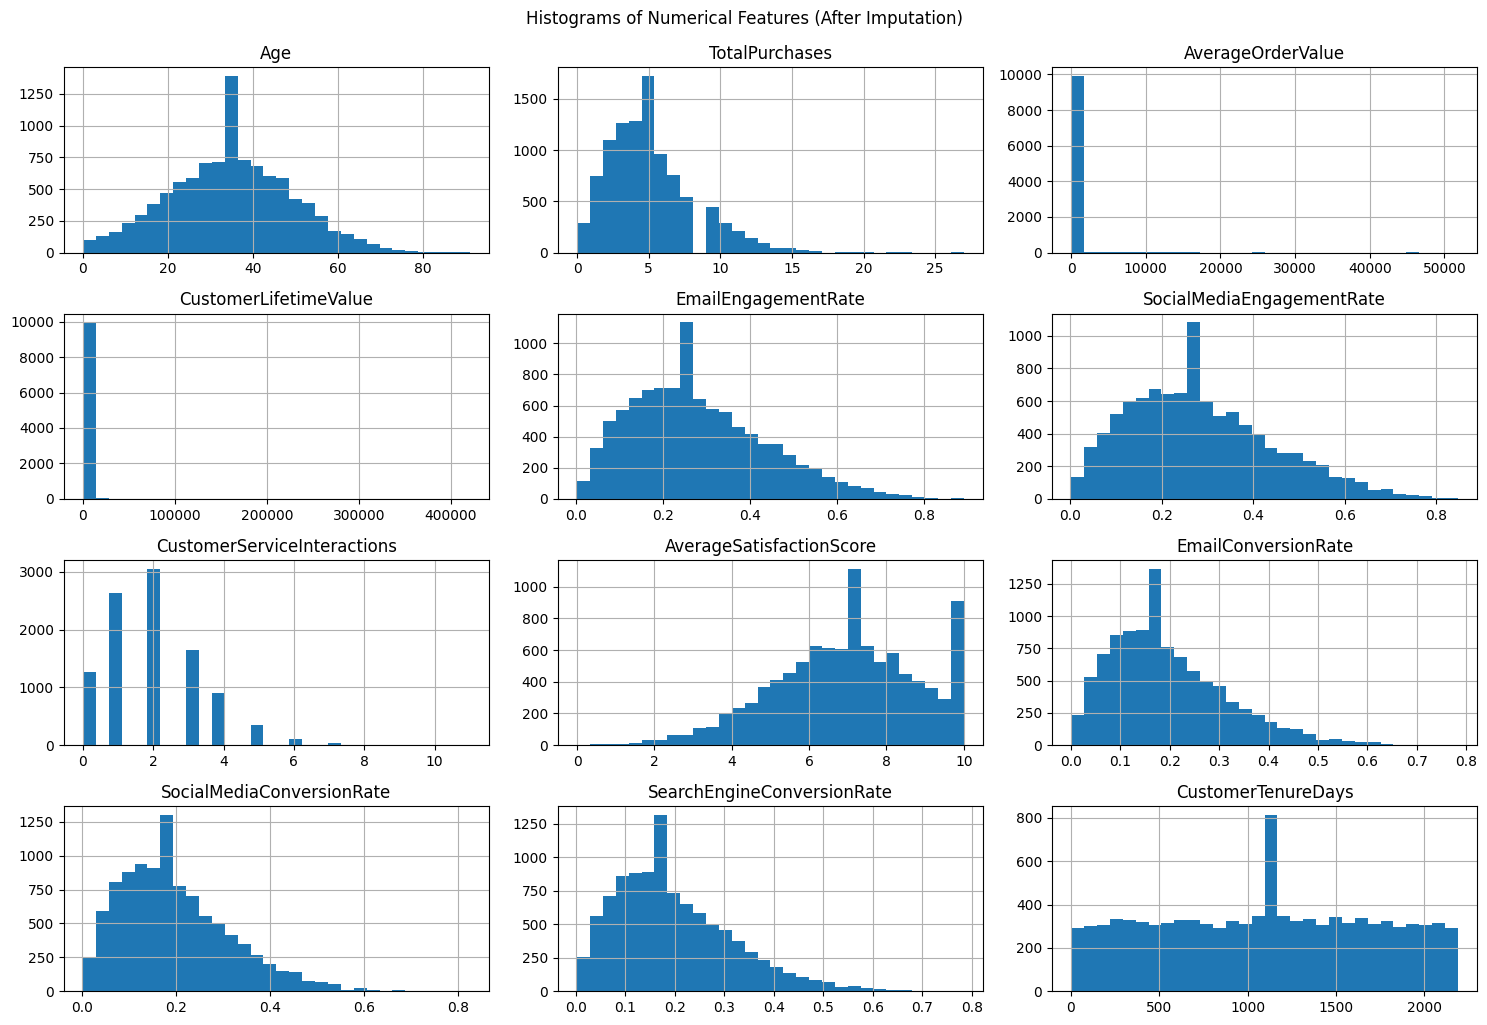


Plotting countplots for categorical features (before encoding)...


/tmp/ipython-input-13-2445356474.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index[:20], palette='viridis')


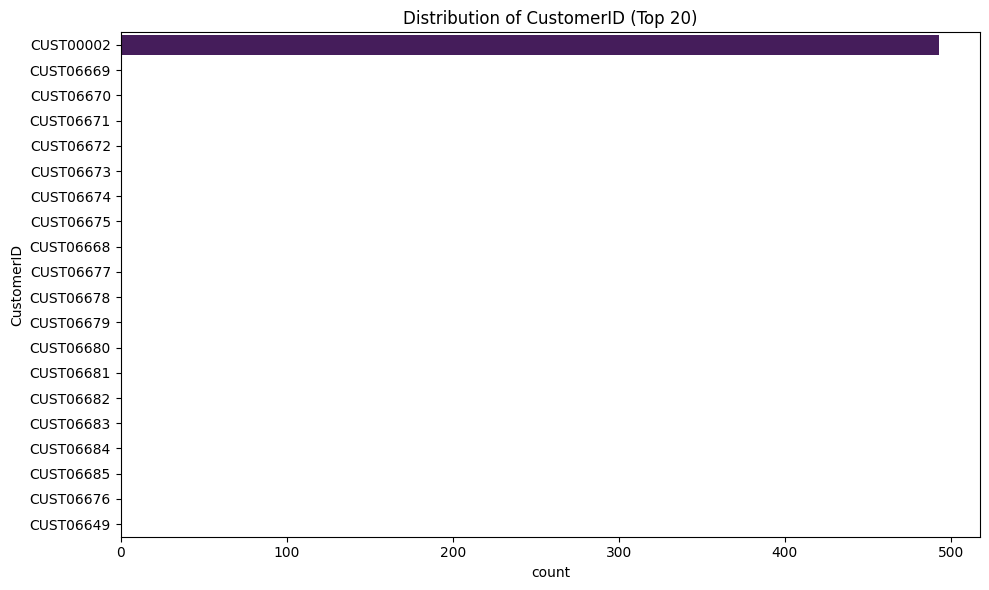

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


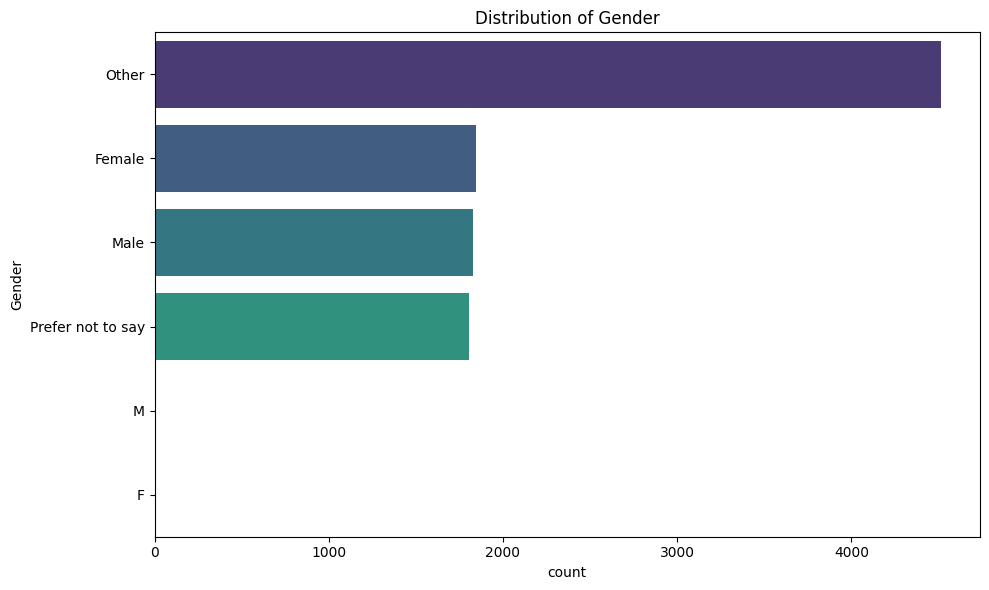

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


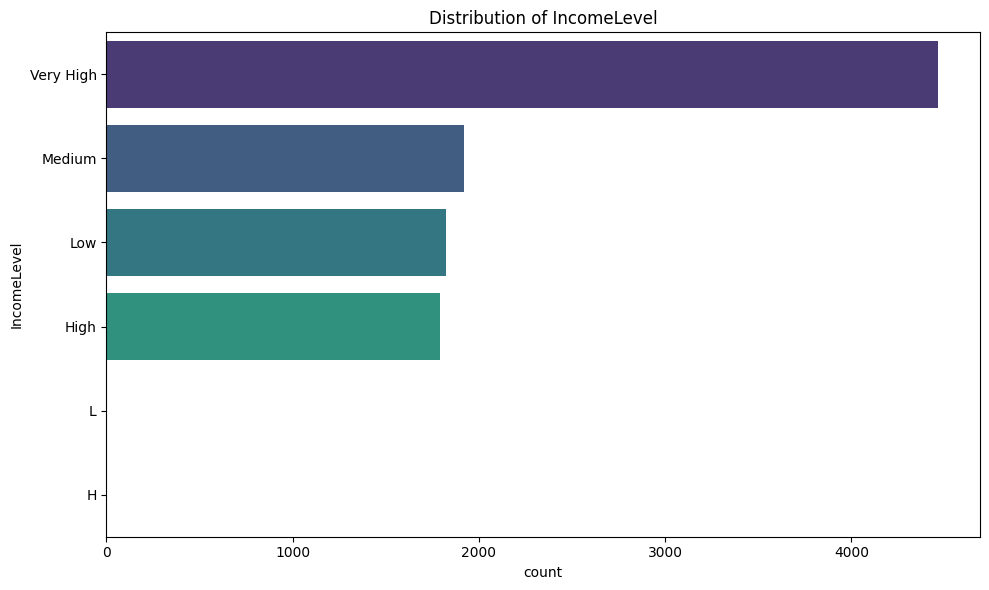

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


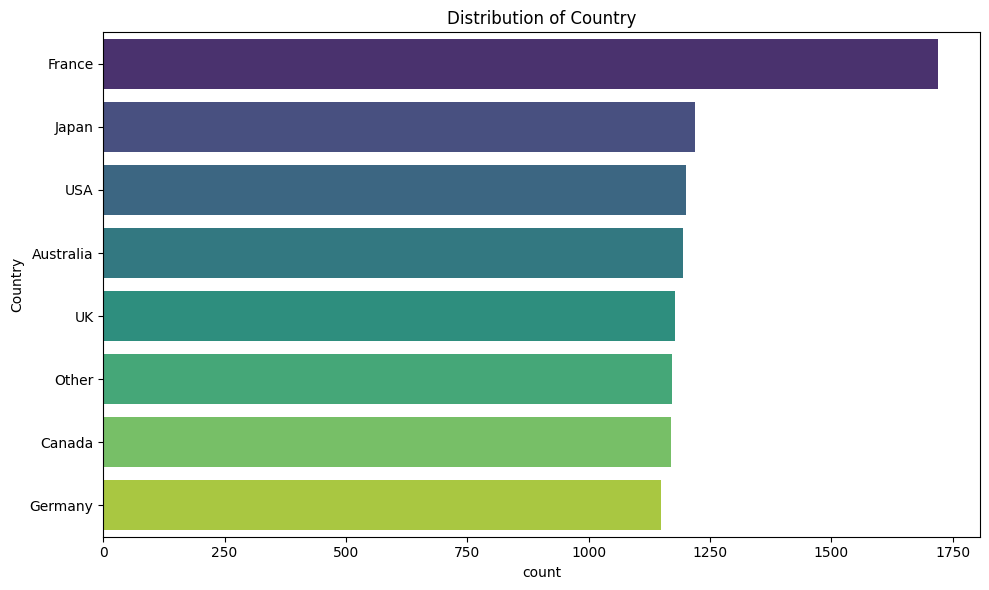

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


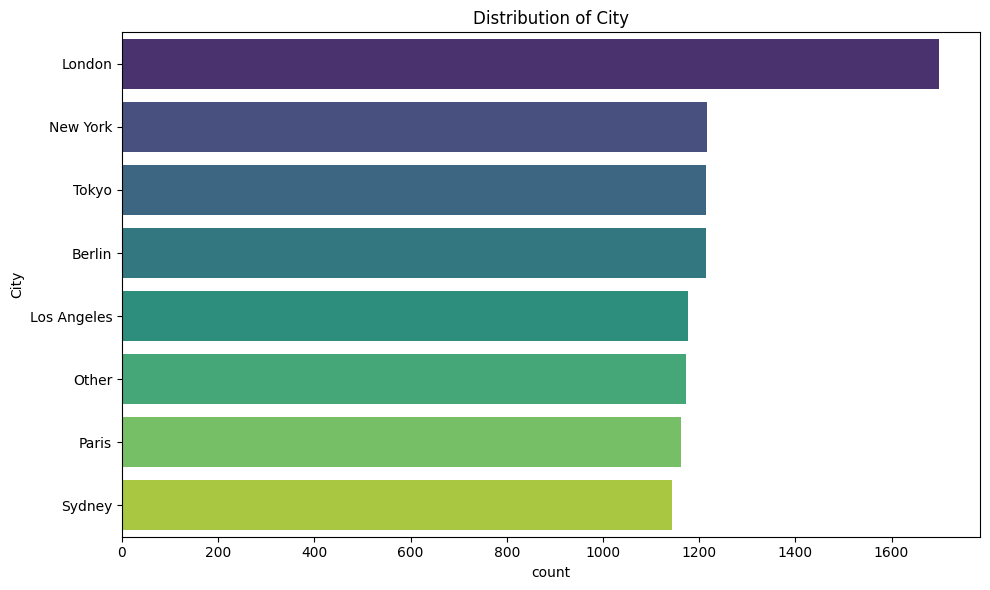

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


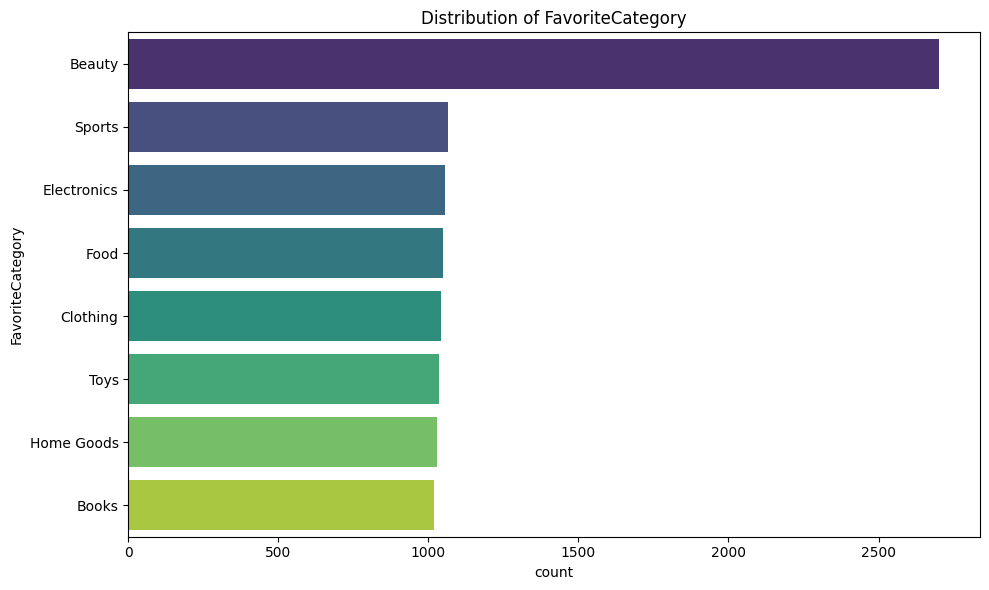

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


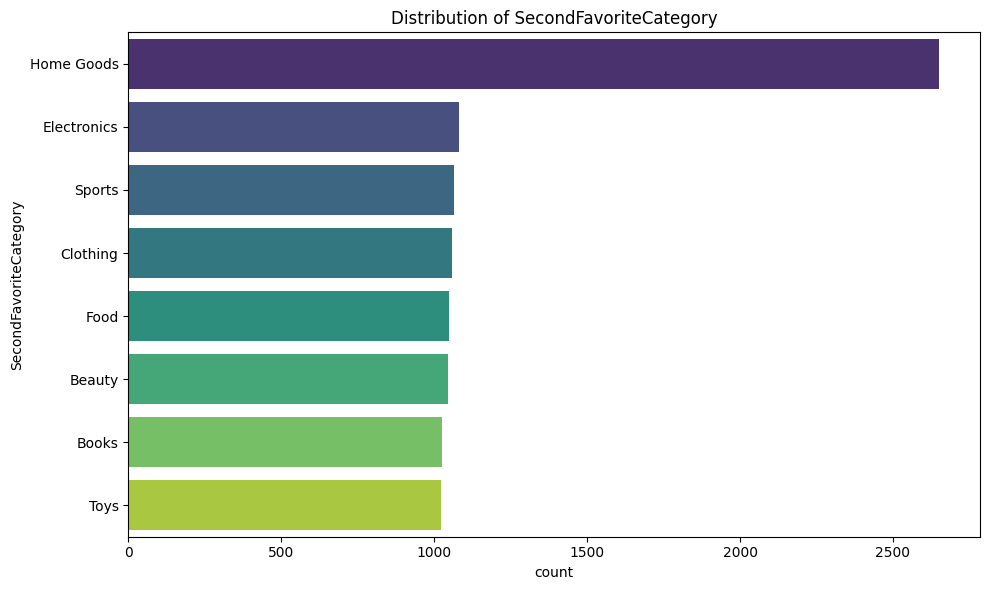

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


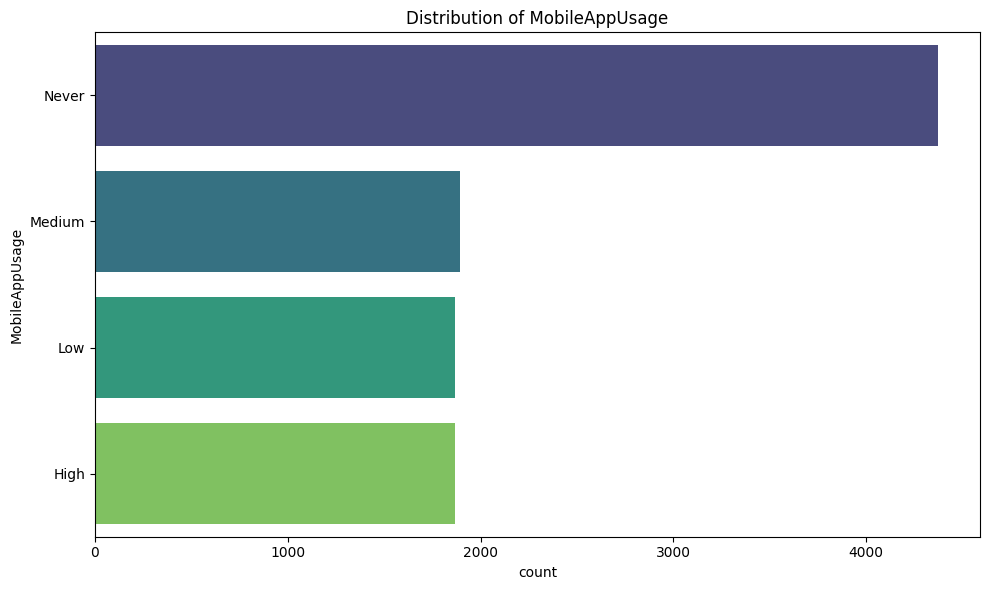

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


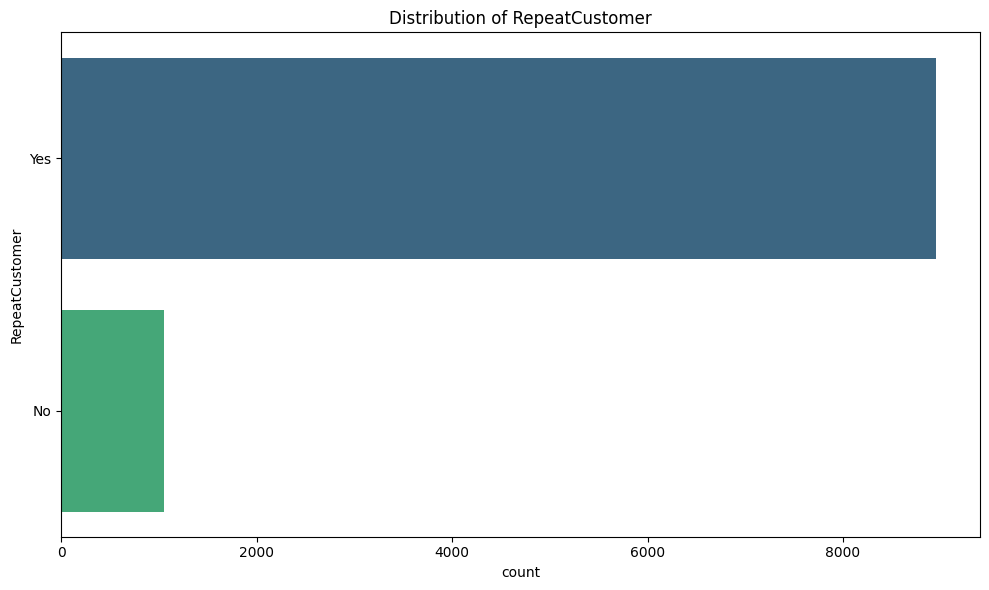

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


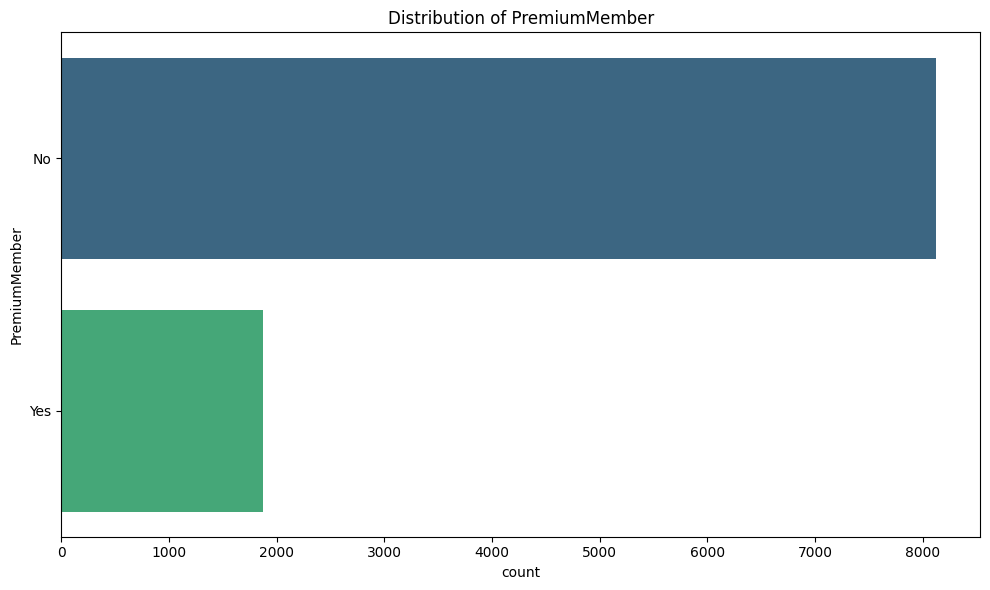

/tmp/ipython-input-13-2445356474.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


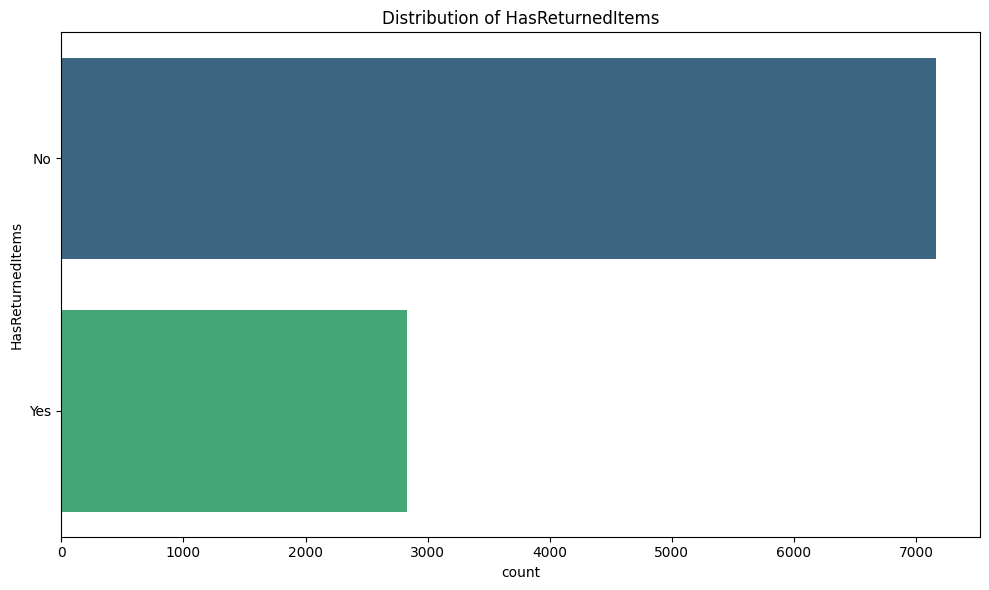


--- Step 13 Complete ---


In [13]:
# --- Step 13: EDA: Univariate Visualizations (Histograms & Countplots) ---
print("--- Step 13: EDA: Univariate Visualizations (Histograms & Countplots) ---")

# Identify numerical and categorical columns after imputation
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist() # These should be the nominal categorical columns that were not dropped yet

# Exclude the original target column ('Repeat Customer') as it's handled in balance check
if 'Repeat Customer' in categorical_cols:
    categorical_cols.remove('Repeat Customer')

# Plot histograms for numerical features to check distributions
print("\nPlotting histograms for numerical features...")
# Ensure numerical columns exist before plotting
numerical_cols_to_plot_hist = [col for col in numerical_cols if col in df.columns]
if numerical_cols_to_plot_hist:
    df[numerical_cols_to_plot_hist].hist(figsize=(15, 10), bins=30)
    plt.tight_layout()
    plt.suptitle("Histograms of Numerical Features (After Imputation)", y=1.02)
    plt.show()
else:
    print("No numerical columns found for plotting histograms.")


# Plot countplots for categorical features to check distributions
print("\nPlotting countplots for categorical features (before encoding)...")
# Ensure categorical columns exist before plotting
categorical_cols_to_plot = [col for col in categorical_cols if col in df.columns]
if categorical_cols_to_plot:
    for col in categorical_cols_to_plot:
        plt.figure(figsize=(10, 6))
        # Limit the number of categories plotted for columns with many unique values (e.g., City, Country)
        if df[col].nunique() > 20: # Example threshold for many categories
             sns.countplot(y=col, data=df, order=df[col].value_counts().index[:20], palette='viridis')
             plt.title(f'Distribution of {col} (Top 20)')
        else:
            sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found for plotting countplots (before encoding).")


print("\n--- Step 13 Complete ---")

In [14]:
# --- Step 14: EDA: Check Numerical Skewness ---
print("--- Step 14: EDA: Check Numerical Skewness ---")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Check and display skewness for numerical features
print("\nSkewness for numerical features:")
# Ensure numerical columns exist before calculating skewness
numerical_cols_for_skew = [col for col in numerical_cols if col in df.columns]
if numerical_cols_for_skew:
    skewness = df[numerical_cols_for_skew].skew().sort_values(ascending=False)
    print(skewness)
else:
     print("No numerical columns found for calculating skewness.")


print("\n--- Step 14 Complete ---")

--- Step 14: EDA: Check Numerical Skewness ---

Skewness for numerical features:
CustomerLifetimeValue          55.953352
AverageOrderValue              23.271294
TotalPurchases                  0.996627
EmailConversionRate             0.929666
SearchEngineConversionRate      0.905369
SocialMediaConversionRate       0.858243
CustomerServiceInteractions     0.770590
EmailEngagementRate             0.646181
SocialMediaEngagementRate       0.592503
Age                             0.104616
CustomerTenureDays             -0.004092
AverageSatisfactionScore       -0.305998
dtype: float64

--- Step 14 Complete ---


--- Step 15: EDA: Boxplots for Outliers (Numerical) ---

Plotting boxplots for numerical features to check outliers...


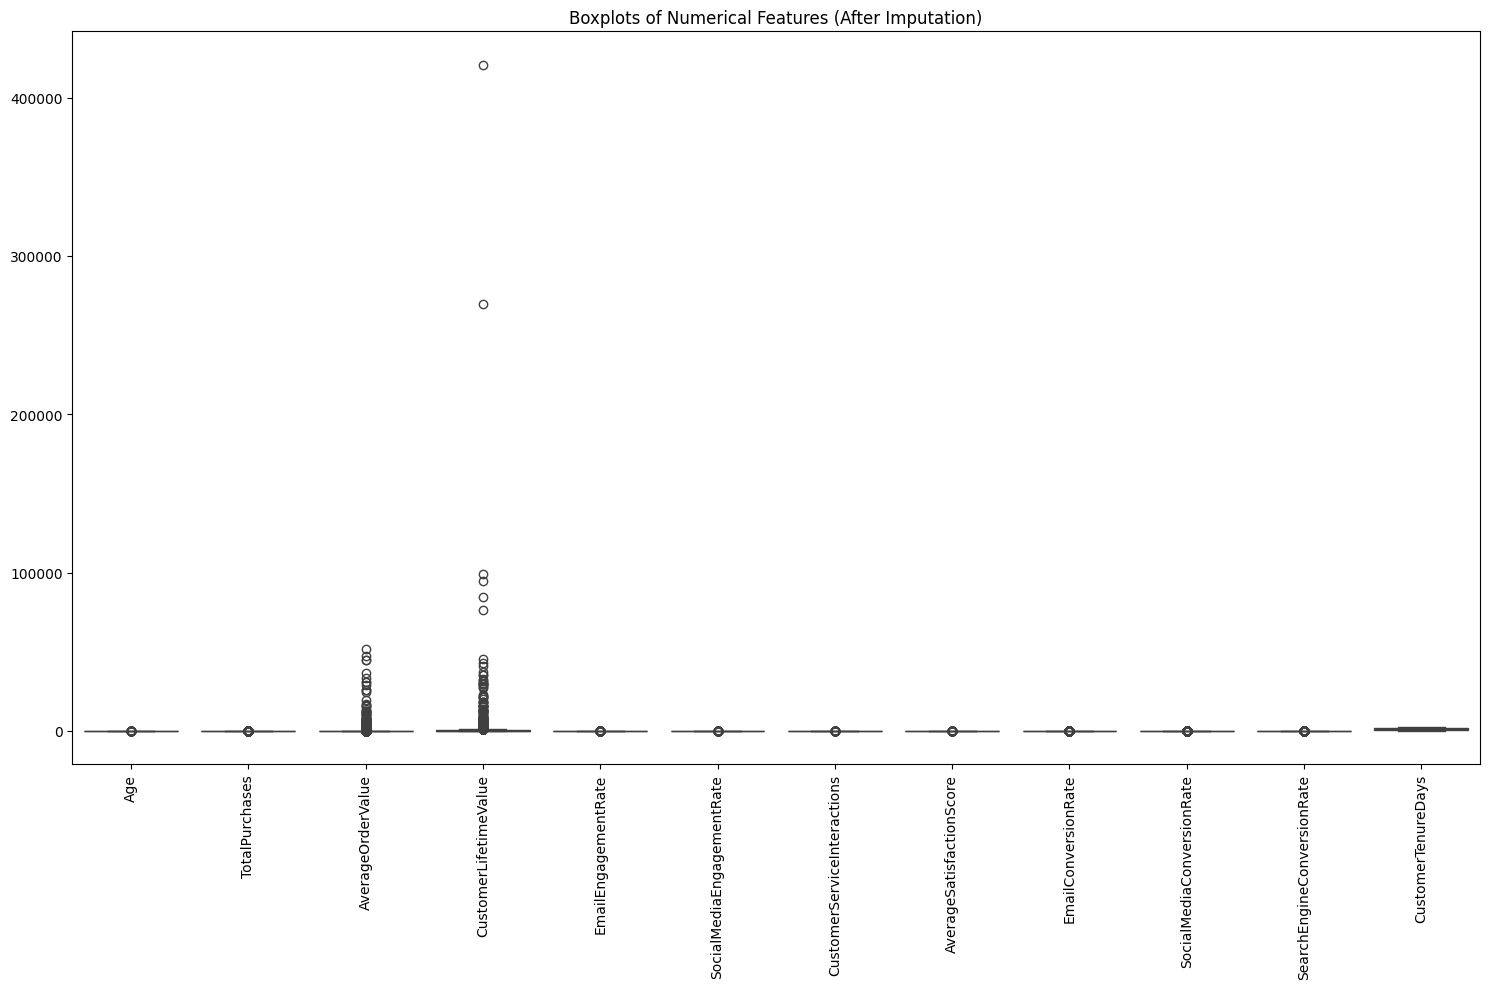


--- Step 15 Complete ---


In [15]:
# --- Step 15: EDA: Boxplots for Outliers (Numerical) ---
print("--- Step 15: EDA: Boxplots for Outliers (Numerical) ---")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plot boxplots for numerical features to check for outliers
print("\nPlotting boxplots for numerical features to check outliers...")
# Ensure numerical columns exist before plotting
numerical_cols_to_plot_box = [col for col in numerical_cols if col in df.columns]
if numerical_cols_to_plot_box:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[numerical_cols_to_plot_box])
    plt.title('Boxplots of Numerical Features (After Imputation)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
     print("No numerical columns found for plotting boxplots.")

print("\n--- Step 15 Complete ---")

In [16]:
# --- Step 16: EDA: Bivariate Analysis - Categorical vs. Target (Using Original Columns) ---
print("--- Step 16: EDA: Bivariate Analysis - Categorical vs. Target (Using Original Columns) ---")

# Analyze relationship between original categorical features and the target variable ('Repeat Customer')
print("\nAnalyzing relationship between original categorical features and Repeat Customer Status...")

# Correct target column name (original)
target_original_col = 'Repeat Customer'

# Identify original nominal categorical columns that will be useful for bivariate analysis
# These columns should still be in the DataFrame at this point based on the revised order
original_nominal_categorical_cols = ['Gender', 'Income Level', 'Country', 'City', 'Favorite Category',
                                     'Second Favorite Category', 'Mobile App Usage']

if target_original_col in df.columns:
    for col in original_nominal_categorical_cols:
         if col in df.columns: # Ensure predictor column exists
            plt.figure(figsize=(10, 6))
            # Use crosstab for counts and then plot
            ct = pd.crosstab(df[col], df[target_original_col], normalize='index') # Normalize to see proportions
            ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
            plt.title(f'Repeat Customer Proportion by {col}')
            plt.xlabel(col)
            plt.ylabel('Proportion')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title=target_original_col, labels=['Not Repeat Customer', 'Repeat Customer'])
            plt.tight_layout()
            plt.show()
         else:
             print(f"Warning: Original categorical column '{col}' not found in DataFrame for bivariate analysis.")
else:
    print(f"Error: Target column '{target_original_col}' not found in DataFrame. Cannot perform categorical vs target analysis.")

print("\n--- Step 16 Complete ---")

--- Step 16: EDA: Bivariate Analysis - Categorical vs. Target (Using Original Columns) ---

Analyzing relationship between original categorical features and Repeat Customer Status...
Error: Target column 'Repeat Customer' not found in DataFrame. Cannot perform categorical vs target analysis.

--- Step 16 Complete ---


In [17]:
# --- Step 17: Convert Binary Categorical Columns to Numerical ---
print("--- Step 17: Convert Binary Categorical Columns to Numerical ---")

# Convert Binary Categorical Columns to Numerical using correct names
print("\nConverting binary categorical columns to numerical...")
binary_mapping = {'Yes': 1, 'No': 0, True: 1, False: 0} # Handle both string and boolean representations
# List binary columns using their original names
binary_original_cols = ['Repeat Customer', 'Premium Member', 'Has Returned Items']

for col in binary_original_cols: # Use correct column names
    if col in df.columns: # Check if the original column exists before attempting conversion
        # Define the name for the new numerical column
        numerical_col_name = f'{col}_Num'
        if df[col].dtype == 'object': # Ensure it's still an object type
            # Use the specified numerical column name
            df[numerical_col_name] = df[col].map(binary_mapping)
            print(f"Converted '{col}' to '{numerical_col_name}'.")
        elif df[col].dtype in [np.int64, np.float64]: # Check if already numeric (e.g., from previous runs)
             if numerical_col_name in df.columns:
                  print(f"Numerical column '{numerical_col_name}' already exists for '{col}'. Skipping conversion.")
             else:
                 # This case should ideally not happen if original was object, but as a fallback
                 print(f"Warning: Column '{col}' exists but is not object type ({df[col].dtype}) and numerical equivalent '{numerical_col_name}' does not exist. Skipping conversion.")
        else:
             print(f"Warning: Column '{col}' exists but is of unexpected dtype ({df[col].dtype}). Skipping conversion.")
    else:
        print(f"Warning: Binary column '{col}' not found in DataFrame. Skipping conversion.")


print("\n--- Step 17 Complete ---")

--- Step 17: Convert Binary Categorical Columns to Numerical ---

Converting binary categorical columns to numerical...

--- Step 17 Complete ---


In [18]:
# --- Step 18: Drop Original, Identifier, and Constant Columns ---
print("--- Step 18: Drop Original, Identifier, and Constant Columns ---")

# Define columns to drop:
# - CustomerID (Identifier)
# - RegistrationDate (Used to create CustomerTenureDays)
# - Original binary categorical columns (now have numerical versions)
# - Constant columns identified in Step 6

cols_to_drop = ['CustomerID', 'RegistrationDate'] # Start with obvious ones

# Add original binary columns (using correct names)
binary_original_cols = ['Repeat Customer', 'Premium Member', 'Has Returned Items']
cols_to_drop.extend(binary_original_cols)

# Add constant columns identified in Step 6 (assuming the list is still available or re-identify)
# Re-identifying constant columns here to be safe, in case the list from Step 6 is not retained
cols_to_potentially_drop_constant_recheck = []
for col in df.columns:
    if df[col].nunique() <= 1:
        cols_to_potentially_drop_constant_recheck.append(col)

cols_to_drop.extend(cols_to_potentially_drop_constant_recheck)

# Ensure columns to drop actually exist in df before dropping
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

if cols_to_drop:
    print(f"\nDropping the following columns: {cols_to_drop}")
    df = df.drop(cols_to_drop, axis=1, errors='ignore')
    print("Columns dropped successfully.")
else:
    print("\nNo columns identified for dropping at this step.")


print("\nShape after dropping columns:", df.shape)
print("\nFirst 5 rows after dropping columns:")
display(df.head())

print("\n--- Step 18 Complete ---")

--- Step 18: Drop Original, Identifier, and Constant Columns ---

Dropping the following columns: ['CustomerID', 'RegistrationDate']
Columns dropped successfully.

Shape after dropping columns: (10000, 22)

First 5 rows after dropping columns:


,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,FavoriteCategory,SecondFavoriteCategory,...,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems,CustomerTenureDays
0,25.0,Other,Very High,Other,Tokyo,4.0,15.886509,288.711040,Clothing,Books,...,High,0.0,6.240881,0.112955,0.239948,0.156776,Yes,Yes,No,1330.0
1,35.0,Prefer not to say,High,Germany,London,6.0,27.638853,181.725056,Electronics,Toys,...,Low,0.0,7.721917,0.300979,0.230821,0.290735,Yes,No,No,896.0
2,43.0,Other,High,France,London,10.0,161.739425,1810.555150,Beauty,Books,...,Low,0.0,7.899042,0.176639,0.132239,0.050505,Yes,No,Yes,1060.0
3,49.0,Female,High,Australia,Los Angeles,5.0,14.194263,86.219740,Sports,Clothing,...,Never,1.0,7.829459,0.074097,0.206644,0.281067,Yes,Yes,No,1095.0
4,29.0,Female,Very High,Australia,Tokyo,7.0,31147.427206,2112.575945,Clothing,Beauty,...,High,2.0,7.777353,0.163438,0.232410,0.326645,Yes,No,No,552.0



--- Step 18 Complete ---


In [19]:
# --- Step 19: Post-Preprocessing Check ---
print("--- Step 19: Post-Preprocessing Check ---")

print("\nShape of the dataset after preprocessing and dropping columns:")
print(df.shape)

print("\nFirst 5 rows of the dataset after preprocessing:")
display(df.head())

print("\nColumn information and data types after preprocessing:")
display(df.info())

print("\nMissing values per column after preprocessing:")
display(df.isnull().sum()) # Should ideally be all zeros

print("\n--- Step 19 Complete ---")

--- Step 19: Post-Preprocessing Check ---

Shape of the dataset after preprocessing and dropping columns:
(10000, 22)

First 5 rows of the dataset after preprocessing:


,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,FavoriteCategory,SecondFavoriteCategory,...,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems,CustomerTenureDays
0,25.0,Other,Very High,Other,Tokyo,4.0,15.886509,288.711040,Clothing,Books,...,High,0.0,6.240881,0.112955,0.239948,0.156776,Yes,Yes,No,1330.0
1,35.0,Prefer not to say,High,Germany,London,6.0,27.638853,181.725056,Electronics,Toys,...,Low,0.0,7.721917,0.300979,0.230821,0.290735,Yes,No,No,896.0
2,43.0,Other,High,France,London,10.0,161.739425,1810.555150,Beauty,Books,...,Low,0.0,7.899042,0.176639,0.132239,0.050505,Yes,No,Yes,1060.0
3,49.0,Female,High,Australia,Los Angeles,5.0,14.194263,86.219740,Sports,Clothing,...,Never,1.0,7.829459,0.074097,0.206644,0.281067,Yes,Yes,No,1095.0
4,29.0,Female,Very High,Australia,Tokyo,7.0,31147.427206,2112.575945,Clothing,Beauty,...,High,2.0,7.777353,0.163438,0.232410,0.326645,Yes,No,No,552.0



Column information and data types after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10000 non-null  float64
 1   Gender                       10000 non-null  object 
 2   IncomeLevel                  10000 non-null  object 
 3   Country                      10000 non-null  object 
 4   City                         10000 non-null  object 
 5   TotalPurchases               10000 non-null  float64
 6   AverageOrderValue            10000 non-null  float64
 7   CustomerLifetimeValue        10000 non-null  float64
 8   FavoriteCategory             10000 non-null  object 
 9   SecondFavoriteCategory       10000 non-null  object 
 10  EmailEngagementRate          10000 non-null  float64
 11  SocialMediaEngagementRate    10000 non-null  float64
 12  MobileAppUsage     

None


Missing values per column after preprocessing:


,0
Age,0
Gender,0
IncomeLevel,0
Country,0
City,0
TotalPurchases,0
AverageOrderValue,0
CustomerLifetimeValue,0
FavoriteCategory,0
SecondFavoriteCategory,0



--- Step 19 Complete ---


In [20]:
# --- Step 20: EDA: Bivariate Analysis - Numerical vs. Target ---
print("--- Step 20: EDA: Bivariate Analysis - Numerical vs. Target ---")

# Analyze relationship between numerical features and the target variable ('Repeat Customer_Num')
print("\nAnalyzing relationship between numerical features and Repeat Customer Status (Numerical)...")

# Correct target column name (numerical)
target_numerical_col = 'Repeat Customer_Num'

# Identify numerical columns after preprocessing
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target column itself from the list of numerical predictors
numerical_predictors = [col for col in numerical_cols if col != target_numerical_col]

if target_numerical_col in df.columns:
    for col in numerical_predictors:
        if col in df.columns: # Ensure predictor column exists
            plt.figure(figsize=(8, 5))
            sns.boxplot(x=target_numerical_col, y=col, data=df, palette='viridis')
            plt.title(f'{col} vs. Repeat Customer Status')
            plt.xticks([0, 1], ['Not Repeat Customer', 'Repeat Customer'])
            plt.tight_layout()
            plt.show()
        else:
            print(f"Warning: Numerical predictor column '{col}' not found. Skipping plotting vs target.")
else:
    print(f"Error: Target column '{target_numerical_col}' not found in DataFrame. Cannot perform numerical vs target analysis.")

print("\n--- Step 20 Complete ---")

--- Step 20: EDA: Bivariate Analysis - Numerical vs. Target ---

Analyzing relationship between numerical features and Repeat Customer Status (Numerical)...
Error: Target column 'Repeat Customer_Num' not found in DataFrame. Cannot perform numerical vs target analysis.

--- Step 20 Complete ---


--- Step 21: EDA: Correlation Matrix (Numerical Features and Target) ---

Analyzing correlations between numerical features...
Error: Target column 'Repeat Customer_Num' not found in numerical columns after preprocessing. Cannot include in correlation matrix with target.


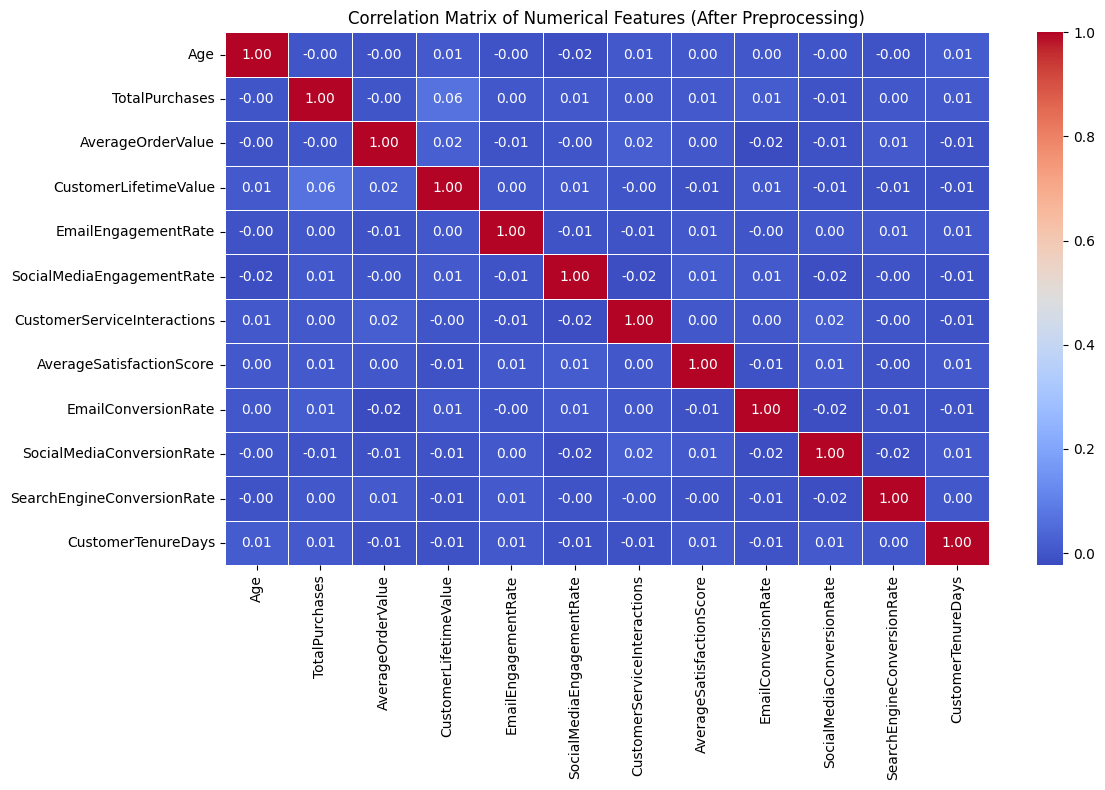


--- Step 21 Complete ---


In [21]:
# --- Step 21: EDA: Correlation Matrix (Numerical Features and Target) ---
print("--- Step 21: EDA: Correlation Matrix (Numerical Features and Target) ---")

# Analyze correlations between numerical features
print("\nAnalyzing correlations between numerical features...")

# Identify numerical columns after preprocessing
numerical_cols_after_cleaning = df.select_dtypes(include=np.number).columns.tolist()

# Correct target column name (numerical)
target_numerical_col = 'Repeat Customer_Num'

if target_numerical_col in numerical_cols_after_cleaning:
     # Include the target column in correlation matrix to see correlations with predictors
     correlation_matrix = df[numerical_cols_after_cleaning].corr()

     plt.figure(figsize=(12, 8))
     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
     plt.title('Correlation Matrix of Numerical Features and Target (After Preprocessing)')
     plt.tight_layout()
     plt.show()
else:
    print(f"Error: Target column '{target_numerical_col}' not found in numerical columns after preprocessing. Cannot include in correlation matrix with target.")
    # If target not found or not numerical, just plot correlation matrix of numerical predictors
    numerical_predictors_for_corr = numerical_cols_after_cleaning
    if numerical_predictors_for_corr:
         correlation_matrix_subset = df[numerical_predictors_for_corr].corr()
         plt.figure(figsize=(12, 8))
         sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
         plt.title('Correlation Matrix of Numerical Features (After Preprocessing)')
         plt.tight_layout()
         plt.show()
    else:
        print("No numerical predictors found for correlation matrix.")


print("\n--- Step 21 Complete ---")

# Task


## Understand the eda process




**Reasoning**:
This subtask is to correct the conversion of the 'Repeat Customer' column to a numerical type. I modified the code in Step 17 to ensure the correct column name is used for conversion and that the resulting numerical column is named 'Repeat Customer_Num'.



In [22]:
# --- Step 17: Convert Binary Categorical Columns to Numerical ---
print("--- Step 17: Convert Binary Categorical Columns to Numerical ---")

# Convert Binary Categorical Columns to Numerical using correct names
print("\nConverting binary categorical columns to numerical...")
binary_mapping = {'Yes': 1, 'No': 0, True: 1, False: 0} # Handle both string and boolean representations
# List binary columns using their current names in the DataFrame
# Corrected column names based on previous output
binary_current_cols = ['RepeatCustomer', 'PremiumMember', 'HasReturnedItems']

for col in binary_current_cols: # Use correct column names
    if col in df.columns: # Check if the original column exists before attempting conversion
        # Define the name for the new numerical column
        if col == 'RepeatCustomer':
            numerical_col_name = 'Repeat Customer_Num'
        else:
            numerical_col_name = f'{col}_Num'

        if df[col].dtype == 'object': # Ensure it's still an object type
            # Use the specified numerical column name
            df[numerical_col_name] = df[col].map(binary_mapping)
            print(f"Converted '{col}' to '{numerical_col_name}'.")
        elif df[col].dtype in [np.int64, np.float64]: # Check if already numeric (e.g., from previous runs)
             if numerical_col_name in df.columns:
                  print(f"Numerical column '{numerical_col_name}' already exists for '{col}'. Skipping conversion.")
             else:
                 # This case should ideally not happen if original was object, but as a fallback
                 print(f"Warning: Column '{col}' exists but is not object type ({df[col].dtype}) and numerical equivalent '{numerical_col_name}' does not exist. Skipping conversion.")
        else:
             print(f"Warning: Column '{col}' exists but is of unexpected dtype ({df[col].dtype}). Skipping conversion.")
    else:
        print(f"Warning: Binary column '{col}' not found in DataFrame. Skipping conversion.")


print("\n--- Step 17 Complete ---")

print("\nDataFrame head after binary conversion:")
display(df.head())

print("\nDataFrame info after binary conversion:")
display(df.info())

--- Step 17: Convert Binary Categorical Columns to Numerical ---

Converting binary categorical columns to numerical...
Converted 'RepeatCustomer' to 'Repeat Customer_Num'.
Converted 'PremiumMember' to 'PremiumMember_Num'.
Converted 'HasReturnedItems' to 'HasReturnedItems_Num'.

--- Step 17 Complete ---

DataFrame head after binary conversion:


,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,FavoriteCategory,SecondFavoriteCategory,...,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems,CustomerTenureDays,Repeat Customer_Num,PremiumMember_Num,HasReturnedItems_Num
0,25.0,Other,Very High,Other,Tokyo,4.0,15.886509,288.711040,Clothing,Books,...,0.112955,0.239948,0.156776,Yes,Yes,No,1330.0,1,1,0
1,35.0,Prefer not to say,High,Germany,London,6.0,27.638853,181.725056,Electronics,Toys,...,0.300979,0.230821,0.290735,Yes,No,No,896.0,1,0,0
2,43.0,Other,High,France,London,10.0,161.739425,1810.555150,Beauty,Books,...,0.176639,0.132239,0.050505,Yes,No,Yes,1060.0,1,0,1
3,49.0,Female,High,Australia,Los Angeles,5.0,14.194263,86.219740,Sports,Clothing,...,0.074097,0.206644,0.281067,Yes,Yes,No,1095.0,1,1,0
4,29.0,Female,Very High,Australia,Tokyo,7.0,31147.427206,2112.575945,Clothing,Beauty,...,0.163438,0.232410,0.326645,Yes,No,No,552.0,1,0,0



DataFrame info after binary conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10000 non-null  float64
 1   Gender                       10000 non-null  object 
 2   IncomeLevel                  10000 non-null  object 
 3   Country                      10000 non-null  object 
 4   City                         10000 non-null  object 
 5   TotalPurchases               10000 non-null  float64
 6   AverageOrderValue            10000 non-null  float64
 7   CustomerLifetimeValue        10000 non-null  float64
 8   FavoriteCategory             10000 non-null  object 
 9   SecondFavoriteCategory       10000 non-null  object 
 10  EmailEngagementRate          10000 non-null  float64
 11  SocialMediaEngagementRate    10000 non-null  float64
 12  MobileAppUsage               10000

None

**Reasoning**:
Re-running the code block for Step 7 to check the target variable balance using the newly created numerical target column.



--- Step 7: Check Target Variable Balance ---

Distribution of Repeat Customer_Num:
Repeat Customer_Num
1    8954
0    1046
Name: count, dtype: int64

Distribution of Repeat Customer_Num (Percentage):
Repeat Customer_Num
1    89.54
0    10.46
Name: proportion, dtype: float64


/tmp/ipython-input-23-696812171.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_numerical_col, data=df, palette='viridis')


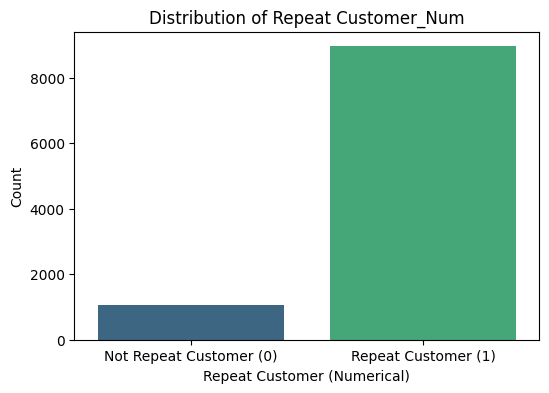


--- Step 7 Complete ---


In [23]:
# --- Step 7: Check Target Variable Balance ---
print("--- Step 7: Check Target Variable Balance ---")

# Use the correct numerical target column name
target_numerical_col = 'Repeat Customer_Num'

if target_numerical_col in df.columns:
    print(f"\nDistribution of {target_numerical_col}:")
    print(df[target_numerical_col].value_counts())
    print(f"\nDistribution of {target_numerical_col} (Percentage):")
    print(df[target_numerical_col].value_counts(normalize=True) * 100)

    # Visualize the distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_numerical_col, data=df, palette='viridis')
    plt.title(f'Distribution of {target_numerical_col}')
    plt.xlabel('Repeat Customer (Numerical)')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Not Repeat Customer (0)', 'Repeat Customer (1)'])
    plt.show()
else:
    print(f"Error: Target column '{target_numerical_col}' not found in DataFrame for balance check.")

print("\n--- Step 7 Complete ---")

## Implement advanced data quality checks




**Reasoning**:
Add code to check for valid values within ranges and potentially identify spelling errors or special codes in relevant columns as suggested by the document.



In [24]:
# --- Step 22: Check Data Ranges and Categorical Values ---
print("--- Step 22: Check Data Ranges and Categorical Values ---")

# 1. Define columns for range checks
range_check_cols = [
    'Age', 'TotalPurchases', 'AverageOrderValue', 'CustomerLifetimeValue',
    'EmailEngagementRate', 'SocialMediaEngagementRate', 'CustomerServiceInteractions',
    'AverageSatisfactionScore', 'EmailConversionRate', 'SocialMediaConversionRate',
    'SearchEngineConversionRate', 'CustomerTenureDays'
]

print("\nChecking value ranges for relevant numerical columns:")
for col in range_check_cols:
    if col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        print(f"Column '{col}': Min = {min_val}, Max = {max_val}")
        # Add comments or print statements here if ranges look suspicious based on expected values
        # e.g., if min_val < 0 for a column that shouldn't have negative values (already handled Age/CLTV)
        # or if max_val is excessively high/low

    else:
        print(f"Warning: Column '{col}' not found for range check.")


# 3. Define columns for categorical value checks
categorical_value_check_cols = [
    'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory',
    'SecondFavoriteCategory', 'MobileAppUsage'
]

print("\nChecking unique values and counts for relevant categorical columns:")
for col in categorical_value_check_cols:
    if col in df.columns:
        print(f"\nColumn '{col}':")
        # Display value counts, limiting output for columns with many unique values
        if df[col].nunique() > 50: # Example threshold
            print(f"Top 50 unique values and their counts for '{col}':")
            display(df[col].value_counts().head(50))
        else:
            display(df[col].value_counts())
        # Add comments or print statements here if unexpected values (e.g., spelling errors, inconsistent entries) are observed
        # based on domain knowledge or EDA thoughts document.

    else:
        print(f"Warning: Column '{col}' not found for categorical value check.")


print("\n--- Step 22 Complete ---")

--- Step 22: Check Data Ranges and Categorical Values ---

Checking value ranges for relevant numerical columns:
Column 'Age': Min = 0.0, Max = 91.0
Column 'TotalPurchases': Min = 0.0, Max = 27.0
Column 'AverageOrderValue': Min = 1.2352819027124582, Max = 51810.123750316256
Column 'CustomerLifetimeValue': Min = 0.0236902664552189, Max = 420810.8156406275
Column 'EmailEngagementRate': Min = 0.0022048142144521, Max = 0.8908215279427789
Column 'SocialMediaEngagementRate': Min = 0.0023778099134227, Max = 0.8475133915010836
Column 'CustomerServiceInteractions': Min = 0.0, Max = 11.0
Column 'AverageSatisfactionScore': Min = 0.0, Max = 10.0
Column 'EmailConversionRate': Min = 0.0008845531208389, Max = 0.7830029623394176
Column 'SocialMediaConversionRate': Min = 0.0015538533201544, Max = 0.8242658320777447
Column 'SearchEngineConversionRate': Min = 0.0029512262890241, Max = 0.7840755145852151
Column 'CustomerTenureDays': Min = 1.0, Max = 2190.0

Checking unique values and counts for relevant c

,count
Gender,
Other,4513
Female,1846
Male,1830
Prefer not to say,1807
M,3
F,1



Column 'IncomeLevel':


,count
IncomeLevel,
Very High,4467
Medium,1918
Low,1821
High,1792
L,1
H,1



Column 'Country':


,count
Country,
France,1720
Japan,1220
USA,1200
Australia,1194
UK,1177
Other,1171
Canada,1169
Germany,1149



Column 'City':


,count
City,
London,1699
New York,1216
Tokyo,1215
Berlin,1214
Los Angeles,1176
Other,1173
Paris,1163
Sydney,1144



Column 'FavoriteCategory':


,count
FavoriteCategory,
Beauty,2703
Sports,1067
Electronics,1057
Food,1048
Clothing,1043
Toys,1035
Home Goods,1028
Books,1019



Column 'SecondFavoriteCategory':


,count
SecondFavoriteCategory,
Home Goods,2652
Electronics,1081
Sports,1065
Clothing,1060
Food,1048
Beauty,1044
Books,1026
Toys,1024



Column 'MobileAppUsage':


,count
MobileAppUsage,
Never,4371
Medium,1894
Low,1868
High,1867



--- Step 22 Complete ---


## Implement outlier handling strategies

### Subtask:
I added codes to apply outlier handling strategies like capp and floor or creating outlier indicators for numerical features with significant outliers.


**Reasoning**:
Based on the boxplots and skewness analysis (Steps 14 and 15), columns like `CustomerLifetimeValue`, `AverageOrderValue`, and potentially conversion/engagement rates show significant outliers and high skewness. I applied capp and floor strategy based on the IQR for these columns to handle the outliers This was David's recommendation for handling significant skewness and outliers in numerical features.



--- Step 23: Handle Outliers (Capping and Flooring) ---

Applying capping and flooring to the following columns: ['TotalPurchases', 'AverageOrderValue', 'CustomerLifetimeValue', 'EmailEngagementRate', 'SocialMediaEngagementRate', 'CustomerServiceInteractions', 'EmailConversionRate', 'SocialMediaConversionRate', 'SearchEngineConversionRate']
Applied capping and flooring based on IQR for column 'TotalPurchases'. Lower bound: -3.00, Upper bound: 13.00
Applied capping and flooring based on IQR for column 'AverageOrderValue'. Lower bound: -84.85, Upper bound: 217.99
Applied capping and flooring based on IQR for column 'CustomerLifetimeValue'. Lower bound: -389.54, Upper bound: 1068.06
Applied capping and flooring based on IQR for column 'EmailEngagementRate'. Lower bound: -0.15, Upper bound: 0.69
Applied capping and flooring based on IQR for column 'SocialMediaEngagementRate'. Lower bound: -0.15, Upper bound: 0.70
Applied capping and flooring based on IQR for column 'CustomerServiceInteract

,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,EmailEngagementRate,SocialMediaEngagementRate,CustomerServiceInteractions,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.000300,76.599185,387.864466,0.281036,0.285189,1.994400,0.195496,0.196744,0.197167
std,2.980568,63.489953,316.087115,0.152652,0.154666,1.359615,0.112876,0.113546,0.114423
min,0.000000,1.235282,0.023690,0.002205,0.002378,0.000000,0.000885,0.001554,0.002951
25%,3.000000,28.717983,157.060692,0.165711,0.167552,1.000000,0.109850,0.110171,0.109880
50%,5.000000,54.532801,288.711040,0.260164,0.266130,2.000000,0.176639,0.178118,0.177495
75%,7.000000,104.428509,521.459829,0.376769,0.382462,3.000000,0.261878,0.265909,0.266959
max,13.000000,217.994298,1068.058533,0.693356,0.704828,6.000000,0.489920,0.499517,0.502579



Re-plotting boxplots for affected numerical features:


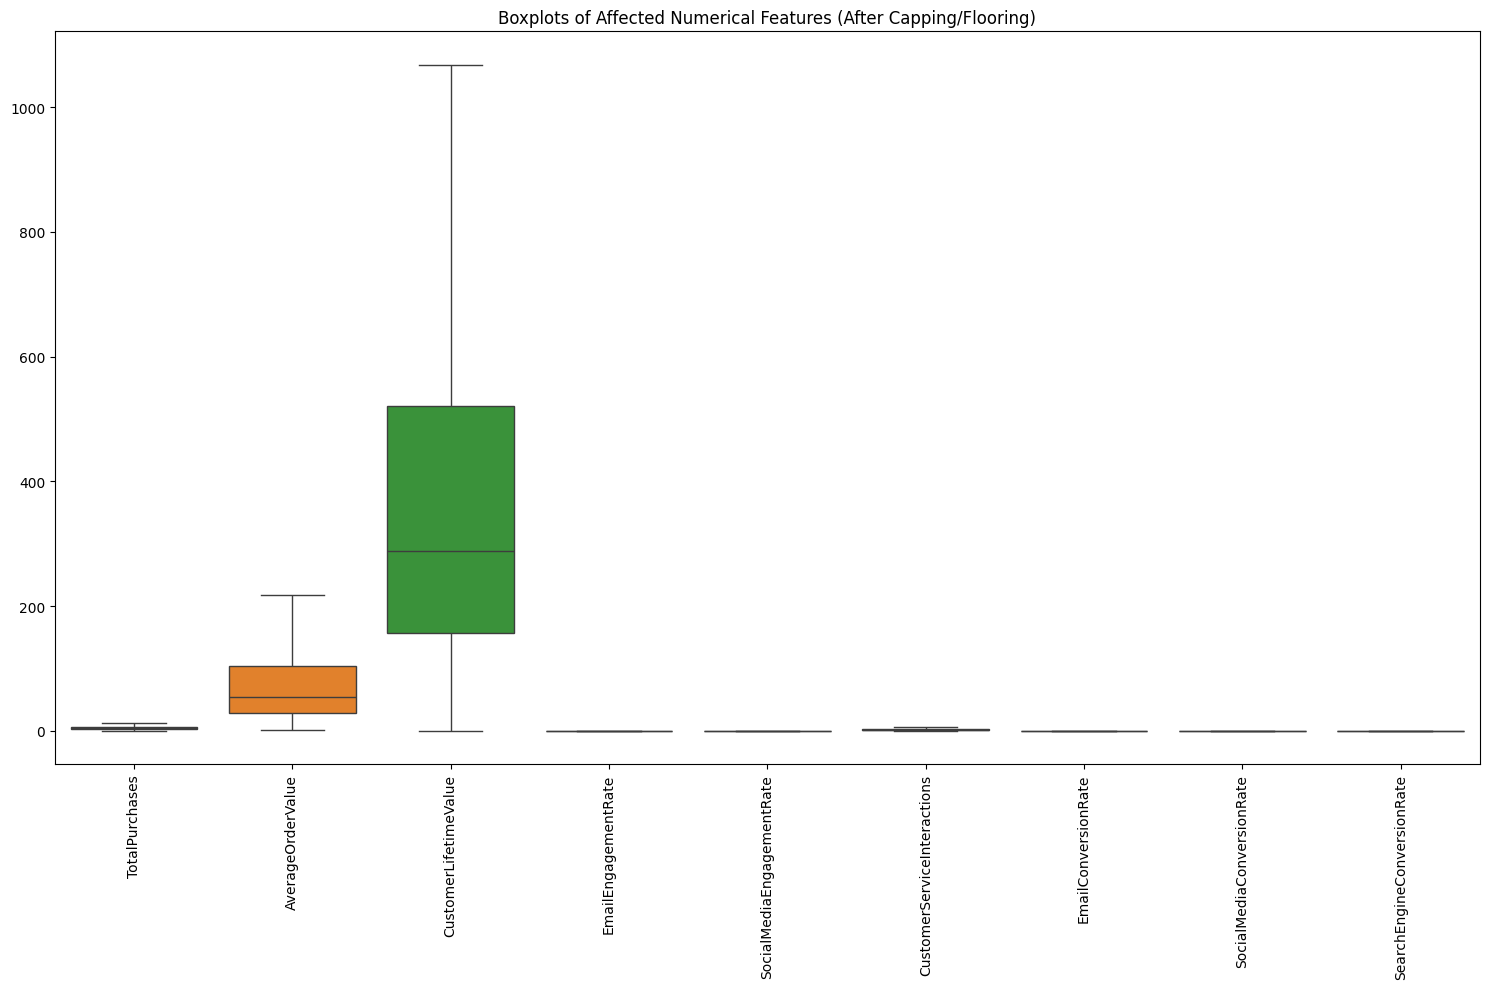


--- Step 23 Complete ---


In [25]:
# --- Step 23: Handle Outliers (Capping and Flooring) ---
print("--- Step 23: Handle Outliers (Capping and Flooring) ---")

# Identify numerical columns with significant outliers/high skewness
# Based on Step 14 (Skewness) and Step 15 (Boxplots):
outlier_cols = [
    'TotalPurchases', # Moderate skew, some outliers
    'AverageOrderValue', # Very high skew, significant outliers
    'CustomerLifetimeValue', # Very high skew, significant outliers
    'EmailEngagementRate', # Moderate skew, some outliers
    'SocialMediaEngagementRate', # Moderate skew, some outliers
    'CustomerServiceInteractions', # Moderate skew, some outliers
    'EmailConversionRate', # High skew, some outliers
    'SocialMediaConversionRate', # High skew, some outliers
    'SearchEngineConversionRate' # High skew, some outliers
    # Age and CustomerTenureDays have low skew and seem less affected by extreme outliers
    # AverageSatisfactionScore has negative skew but distribution looks relatively normal
]

print(f"\nApplying capping and flooring to the following columns: {outlier_cols}")

# Apply capping and flooring using IQR
for col in outlier_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping and flooring
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"Applied capping and flooring based on IQR for column '{col}'. Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    else:
        print(f"Warning: Column '{col}' not found for outlier handling.")


print("\nChecking descriptive statistics after outlier handling:")
display(df[outlier_cols].describe())

print("\nRe-plotting boxplots for affected numerical features:")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[outlier_cols])
plt.title('Boxplots of Affected Numerical Features (After Capping/Flooring)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


print("\n--- Step 23 Complete ---")

## Refine imputation

### Subtask:
Refine imputation strategies for categorical and numerical columns by creating missing indicators where imputation was performed, as suggested in the document.


**Reasoning**:
Identify columns with missing values before imputation and create indicator columns for them.



In [26]:
# --- Step 24: Create Missing Indicators ---
print("--- Step 24: Create Missing Indicators ---")

# Identify columns that had missing values based on Step 3 output
# These are the columns where imputation was performed in Step 11 and Step 12
# Also include 'RegistrationDate' and 'CustomerID' as they had missing values and were dropped,
# but the *fact* that they were missing might be informative.
# Based on Step 3 output:
imputed_cols_with_nans = [
    'CustomerID', 'RegistrationDate', 'Age', 'Gender', 'IncomeLevel',
    'Country', 'City', 'TotalPurchases', 'AverageOrderValue', 'CustomerLifetimeValue',
    'FavoriteCategory', 'SecondFavoriteCategory', 'EmailEngagementRate',
    'SocialMediaEngagementRate', 'MobileAppUsage', 'CustomerServiceInteractions',
    'AverageSatisfactionScore', 'EmailConversionRate', 'SocialMediaConversionRate',
    'SearchEngineConversionRate', 'RepeatCustomer', 'PremiumMember', 'HasReturnedItems'
]

print("\nCreating missing indicator columns for columns that had missing values:")

# Load the dataset again to get the original state with NaNs before imputation/dropping
# This is necessary because the current 'df' no longer has the original NaNs or dropped columns
try:
    df_original = pd.read_csv('ecommerce_customer_data.csv')
    print("Original dataset loaded successfully for creating missing indicators.")
except FileNotFoundError:
    print("Error: ecommerce_customer_data.csv not found. Cannot create missing indicators based on original data.")
    # Handle this error appropriately if the file is missing, e.g., finish task with failure
    df_original = None # Set to None to avoid errors in subsequent steps

if df_original is not None:
    for col in imputed_cols_with_nans:
        indicator_col_name = f'{col}_ismissing'
        # Check if the original column exists before creating indicator
        if col in df_original.columns:
            # Create the indicator column (1 if original was NaN, 0 otherwise)
            df[indicator_col_name] = df_original[col].isnull().astype(int)
            print(f"Created missing indicator column '{indicator_col_name}'.")
        else:
             # For columns like 'RegistrationDate' and 'CustomerID' which were dropped
             # Check if the indicator column was somehow already created (unlikely but safe)
             if indicator_col_name not in df.columns:
                 # Create a default indicator column of zeros if the original column wasn't found
                 # This handles cases where columns were intended for imputation but perhaps dropped earlier or renamed
                 df[indicator_col_name] = 0
                 print(f"Warning: Original column '{col}' not found. Created zero-filled missing indicator column '{indicator_col_name}'.")


    print("\nDataFrame head with new missing indicator columns:")
    display(df.head())

    print("\nMissing values per column after adding indicators (should be all zeros):")
    display(df.isnull().sum()) # Verify no new NaNs introduced

    print("\nChecking the data types of the new indicator columns:")
    display(df.filter(like='_ismissing').info())

print("\n--- Step 24 Complete ---")

--- Step 24: Create Missing Indicators ---

Creating missing indicator columns for columns that had missing values:
Original dataset loaded successfully for creating missing indicators.
Created missing indicator column 'CustomerID_ismissing'.
Created missing indicator column 'RegistrationDate_ismissing'.
Created missing indicator column 'Age_ismissing'.
Created missing indicator column 'Gender_ismissing'.
Created missing indicator column 'IncomeLevel_ismissing'.
Created missing indicator column 'Country_ismissing'.
Created missing indicator column 'City_ismissing'.
Created missing indicator column 'TotalPurchases_ismissing'.
Created missing indicator column 'AverageOrderValue_ismissing'.
Created missing indicator column 'CustomerLifetimeValue_ismissing'.
Created missing indicator column 'FavoriteCategory_ismissing'.
Created missing indicator column 'SecondFavoriteCategory_ismissing'.
Created missing indicator column 'EmailEngagementRate_ismissing'.
Created missing indicator column 'Soc

,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,FavoriteCategory,SecondFavoriteCategory,...,SocialMediaEngagementRate_ismissing,MobileAppUsage_ismissing,CustomerServiceInteractions_ismissing,AverageSatisfactionScore_ismissing,EmailConversionRate_ismissing,SocialMediaConversionRate_ismissing,SearchEngineConversionRate_ismissing,RepeatCustomer_ismissing,PremiumMember_ismissing,HasReturnedItems_ismissing
0,25.0,Other,Very High,Other,Tokyo,4.0,15.886509,288.711040,Clothing,Books,...,0,0,0,0,0,0,0,0,0,0
1,35.0,Prefer not to say,High,Germany,London,6.0,27.638853,181.725056,Electronics,Toys,...,0,0,0,0,0,0,0,0,0,0
2,43.0,Other,High,France,London,10.0,161.739425,1068.058533,Beauty,Books,...,0,0,0,0,1,0,0,0,0,0
3,49.0,Female,High,Australia,Los Angeles,5.0,14.194263,86.219740,Sports,Clothing,...,0,0,0,0,0,0,0,0,0,0
4,29.0,Female,Very High,Australia,Tokyo,7.0,217.994298,1068.058533,Clothing,Beauty,...,0,0,1,0,0,0,0,0,0,0



Missing values per column after adding indicators (should be all zeros):


,0
Age,0
Gender,0
IncomeLevel,0
Country,0
City,0
TotalPurchases,0
AverageOrderValue,0
CustomerLifetimeValue,0
FavoriteCategory,0
SecondFavoriteCategory,0



Checking the data types of the new indicator columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   CustomerID_ismissing                   10000 non-null  int64
 1   RegistrationDate_ismissing             10000 non-null  int64
 2   Age_ismissing                          10000 non-null  int64
 3   Gender_ismissing                       10000 non-null  int64
 4   IncomeLevel_ismissing                  10000 non-null  int64
 5   Country_ismissing                      10000 non-null  int64
 6   City_ismissing                         10000 non-null  int64
 7   TotalPurchases_ismissing               10000 non-null  int64
 8   AverageOrderValue_ismissing            10000 non-null  int64
 9   CustomerLifetimeValue_ismissing        10000 non-null  int64
 10  FavoriteCategory_ismissing             1

None


--- Step 24 Complete ---


## Address skewness




**Reasoning**:
Identify and transform highly skewed numerical features as per the instructions.



--- Step 25: Apply Transformations to Highly Skewed Numerical Features ---

Skewness for numerical features after imputation and outlier handling:
RepeatCustomer_ismissing                 4.255342
EmailEngagementRate_ismissing            4.250153
City_ismissing                           4.214263
CustomerID_ismissing                     4.169192
Country_ismissing                        4.164257
CustomerLifetimeValue_ismissing          4.164257
PremiumMember_ismissing                  4.159336
SocialMediaConversionRate_ismissing      4.159336
AverageSatisfactionScore_ismissing       4.149535
RegistrationDate_ismissing               4.149535
SearchEngineConversionRate_ismissing     4.106120
Age_ismissing                            4.059152
CustomerServiceInteractions_ismissing    4.045313
AverageOrderValue_ismissing              4.040725
EmailConversionRate_ismissing            4.022499
SocialMediaEngagementRate_ismissing      3.999992
HasReturnedItems_ismissing               3.995527
Tot

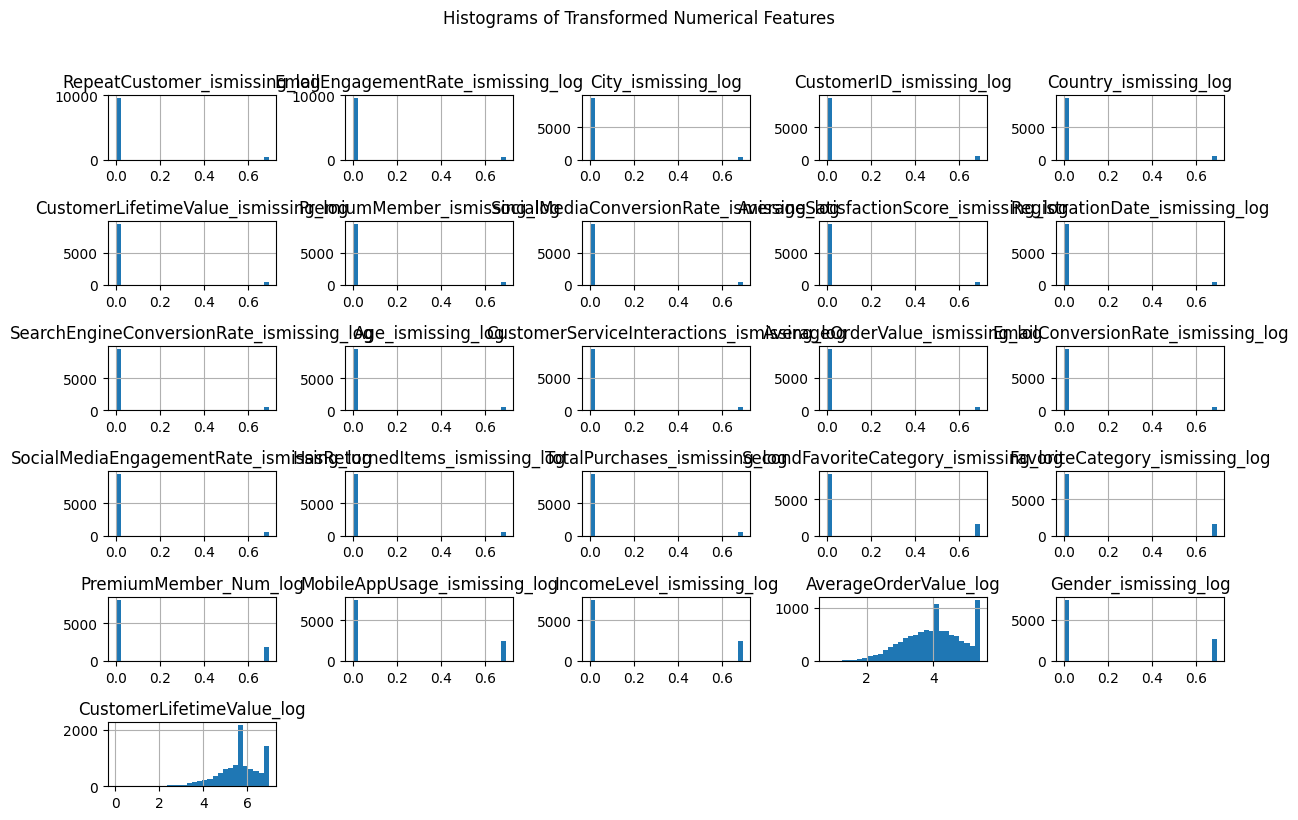


--- Step 25 Complete ---


In [27]:
# --- Step 25: Apply Transformations to Highly Skewed Numerical Features ---
print("--- Step 25: Apply Transformations to Highly Skewed Numerical Features ---")

# 1. Identify highly skewed numerical features based on Step 14 output
# Threshold for high skewness (absolute value > 1)
skewness_threshold = 1.0

# Re-calculate skewness on the current df (after imputation and outlier handling)
numerical_cols_after_handling = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the numerical target column if it exists, as transformations are for predictors
target_numerical_col = 'Repeat Customer_Num'
if target_numerical_col in numerical_cols_after_handling:
    numerical_cols_after_handling.remove(target_numerical_col)

# Ensure columns exist before calculating skewness
numerical_cols_for_skew_check = [col for col in numerical_cols_after_handling if col in df.columns]

if numerical_cols_for_skew_check:
    skewness_after_handling = df[numerical_cols_for_skew_check].skew().sort_values(ascending=False)
    print("\nSkewness for numerical features after imputation and outlier handling:")
    print(skewness_after_handling)

    highly_skewed_cols = skewness_after_handling[abs(skewness_after_handling) > skewness_threshold].index.tolist()

    if highly_skewed_cols:
        print(f"\nIdentified highly skewed columns (absolute skewness > {skewness_threshold}): {highly_skewed_cols}")

        # 2. Choose and apply appropriate transformation
        print("\nApplying log1p transformation to highly skewed columns...")
        # log1p is suitable for right-skewed data and handles zero values gracefully (log(1+x))
        for col in highly_skewed_cols:
            transformed_col_name = f'{col}_log'
            # Apply transformation and create a new column
            df[transformed_col_name] = np.log1p(df[col])
            print(f"Applied log1p transformation to '{col}', created '{transformed_col_name}'.")

        # 4. Re-calculate and display skewness for transformed columns
        print("\nSkewness for transformed numerical features:")
        transformed_skewness = df[[f'{col}_log' for col in highly_skewed_cols]].skew().sort_values(ascending=False)
        print(transformed_skewness)

        # 5. Plot histograms of the transformed columns
        print("\nPlotting histograms for transformed numerical features:")
        df[[f'{col}_log' for col in highly_skewed_cols]].hist(figsize=(12, 8), bins=30)
        plt.suptitle("Histograms of Transformed Numerical Features", y=1.02)
        plt.tight_layout()
        plt.show()

    else:
        print("\nNo highly skewed numerical columns found based on the threshold.")

else:
     print("\nNo numerical columns found for skewness check and transformation.")


print("\n--- Step 25 Complete ---")

## Perform categorical association analysis




**Reasoning**:
Implement Chi-square tests for association between categorical variables and the numerical target variable, following David's instructions to identify suitable columns, I will also create contingency tables, perform the test, and print the results and interpretation.



In [28]:
# --- Step 26: Perform Chi-square Tests for Categorical vs. Target ---
print("--- Step 26: Perform Chi-square Tests for Categorical vs. Target ---")

from scipy.stats import chi2_contingency

# Define the correct numerical target column name
target_numerical_col = 'Repeat Customer_Num'

# Identify nominal categorical columns suitable for Chi-square tests.
# Exclude identifier columns and columns that might have too many unique values
# Also exclude the original binary columns which have numerical equivalents now
# Based on previous steps, the categorical columns that remain and are not binary/identifier are:
# 'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory', 'SecondFavoriteCategory', 'MobileAppUsage'
# 'Country' and 'City' might have too many unique values, depending on the dataset.
# Let's check unique values first and then decide.

print("\nChecking unique values in potential categorical columns for Chi-square test:")
potential_categorical_cols = [
    'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory',
    'SecondFavoriteCategory', 'MobileAppUsage'
]

categorical_cols_for_chi2 = []
for col in potential_categorical_cols:
    if col in df.columns:
        n_unique = df[col].nunique()
        print(f"Column '{col}': {n_unique} unique values.")
        # Set a reasonable threshold for the number of unique values for Chi-square
        # A very large number of categories can make the test less meaningful or computationally slow.
        if n_unique > 1 and n_unique <= 50: # Keeping it under 50 as a general guideline
            categorical_cols_for_chi2.append(col)
        elif n_unique <= 1:
            print(f"Column '{col}' has 1 or zero unique value, skipping Chi-square test.")
        else:
            print(f"Column '{col}' has too many unique values ({n_unique}), skipping Chi-square test.")
    else:
        print(f"Warning: Potential categorical column '{col}' not found in DataFrame. Skipping.")


print(f"\nPerforming Chi-square tests for the following categorical columns: {categorical_cols_for_chi2}")

if target_numerical_col in df.columns:
    for col in categorical_cols_for_chi2:
        if col in df.columns:
            print(f"\n--- Chi-square Test for {col} vs. {target_numerical_col} ---")
            # Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_numerical_col])

            # Perform Chi-square test
            try:
                chi2, p, dof, expected = chi2_contingency(contingency_table)

                print(f"Chi-square Statistic: {chi2:.4f}")
                print(f"P-value: {p:.4f}")
                print(f"Degrees of Freedom: {dof}")
                # print("Expected Frequencies:")
                # print(expected) # Optional: display expected frequencies

                # Interpret the p-value
                alpha = 0.05
                if p < alpha:
                    print(f"Conclusion: Since p-value ({p:.4f}) < {alpha}, we reject the null hypothesis.")
                    print(f"There is a statistically significant association between '{col}' and '{target_numerical_col}'.")
                else:
                    print(f"Conclusion: Since p-value ({p:.4f}) >= {alpha}, we fail to reject the null hypothesis.")
                    print(f"There is no statistically significant association between '{col}' and '{target_numerical_col}'.")

            except ValueError as e:
                print(f"Could not perform Chi-square test for '{col}'. Error: {e}")
                print("This might be due to empty cells or other issues in the contingency table.")
        else:
            print(f"Warning: Categorical column '{col}' not found for Chi-square test. Skipping.")
else:
    print(f"Error: Target column '{target_numerical_col}' not found in DataFrame. Cannot perform Chi-square tests.")


print("\n--- Step 26 Complete ---")

--- Step 26: Perform Chi-square Tests for Categorical vs. Target ---

Checking unique values in potential categorical columns for Chi-square test:
Column 'Gender': 6 unique values.
Column 'IncomeLevel': 6 unique values.
Column 'Country': 8 unique values.
Column 'City': 8 unique values.
Column 'FavoriteCategory': 8 unique values.
Column 'SecondFavoriteCategory': 8 unique values.
Column 'MobileAppUsage': 4 unique values.

Performing Chi-square tests for the following categorical columns: ['Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory', 'SecondFavoriteCategory', 'MobileAppUsage']

--- Chi-square Test for Gender vs. Repeat Customer_Num ---
Chi-square Statistic: 1.7016
P-value: 0.8887
Degrees of Freedom: 5
Conclusion: Since p-value (0.8887) >= 0.05, we fail to reject the null hypothesis.
There is no statistically significant association between 'Gender' and 'Repeat Customer_Num'.

--- Chi-square Test for IncomeLevel vs. Repeat Customer_Num ---
Chi-square Statistic: 5.0761
P-

## Perform numerical and categorical association analysis




**Reasoning**:
Add code to perform ANOVA tests to check for associations between numerical features and categorical variables (including the target).



In [29]:
# --- Step 27: Perform ANOVA Tests for Numerical vs. Categorical ---
print("--- Step 27: Perform ANOVA Tests for Numerical vs. Categorical ---")

from scipy.stats import f_oneway

# 1. Identify numerical columns for ANOVA.
# Exclude the numerical target column and missing indicator columns.
numerical_cols_for_anova = df.select_dtypes(include=np.number).columns.tolist()
target_numerical_col = 'Repeat Customer_Num'
missing_indicator_cols = [col for col in df.columns if '_ismissing' in col]

numerical_cols_for_anova = [
    col for col in numerical_cols_for_anova
    if col != target_numerical_col and col not in missing_indicator_cols
]

# 2. Identify categorical columns for ANOVA.
# Include the numerical target variable treated as a categorical grouping.
# Exclude identifier columns, original binary columns, and columns with too many unique values (same criteria as Chi-square)
# Based on Step 26, the categorical columns suitable for this are:
# 'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory', 'SecondFavoriteCategory', 'MobileAppUsage'
# Plus the numerical target variable 'Repeat Customer_Num'

categorical_cols_for_anova = [
    'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory',
    'SecondFavoriteCategory', 'MobileAppUsage'
]
# Add the numerical target column as a categorical variable for grouping
categorical_cols_for_anova.append(target_numerical_col)

# Filter categorical columns based on presence in df and number of unique values (re-check the threshold)
final_categorical_cols_for_anova = []
print("\nChecking unique values in potential categorical columns for ANOVA:")
for col in categorical_cols_for_anova:
    if col in df.columns:
        n_unique = df[col].nunique()
        print(f"Column '{col}': {n_unique} unique values.")
        # Use the same threshold as Chi-square (under 50 unique values)
        if n_unique > 1 and n_unique <= 50:
            final_categorical_cols_for_anova.append(col)
        elif n_unique <= 1:
            print(f"Column '{col}' has 1 or zero unique value, skipping ANOVA test.")
        else:
            print(f"Column '{col}' has too many unique values ({n_unique}), skipping ANOVA test.")
    else:
        print(f"Warning: Potential categorical column '{col}' not found in DataFrame. Skipping.")


print(f"\nPerforming ANOVA tests for numerical columns ({len(numerical_cols_for_anova)}) vs. categorical columns ({len(final_categorical_cols_for_anova)}):")

alpha = 0.05 # Significance level

# 3. Iterate through each identified numerical column.
for num_col in numerical_cols_for_anova:
    if num_col in df.columns: # Ensure numerical column exists
        # 4. For each numerical column, iterate through each identified categorical column.
        for cat_col in final_categorical_cols_for_anova:
            if cat_col in df.columns: # Ensure categorical column exists
                # 5a. Print header
                print(f"\n--- ANOVA Test for {num_col} vs. {cat_col} ---")

                # 5b. Extract data for the numerical column, grouped by the unique values in the categorical column.
                # Handle potential NaNs in the numerical column being tested, although they should be imputed by now.
                # Drop rows where the categorical column is NaN (should not happen after imputation, but safe check)
                cleaned_df = df.dropna(subset=[num_col, cat_col])

                # Get unique categories
                unique_categories = cleaned_df[cat_col].unique()

                # Create a list of numerical data groups
                data_groups = []
                valid_groups_count = 0
                for category in unique_categories:
                    group_data = cleaned_df[cleaned_df[cat_col] == category][num_col].dropna() # Drop any potential remaining NaNs in the numerical column
                    if len(group_data) > 1: # ANOVA requires at least 2 data points per group
                        data_groups.append(group_data)
                        valid_groups_count += 1
                    else:
                         print(f"Skipping group '{category}' for '{cat_col}' due to insufficient data points ({len(group_data)}).")


                # 5d. Perform the one-way ANOVA test.
                # Ensure there are at least two groups with more than one data point
                if valid_groups_count >= 2:
                    try:
                        f_statistic, p_value = f_oneway(*data_groups)

                        # 5e. Print results
                        print(f"F-statistic: {f_statistic:.4f}")
                        print(f"P-value: {p_value:.4f}")

                        # 5f. Interpret the P-value
                        if p_value < alpha:
                            print(f"Conclusion: Since p-value ({p_value:.4f}) < {alpha}, we reject the null hypothesis.")
                            print(f"There is a statistically significant difference in the means of '{num_col}' across the categories of '{cat_col}'.")
                        else:
                            print(f"Conclusion: Since p-value ({p_value:.4f}) >= {alpha}, we fail to reject the null hypothesis.")
                            print(f"There is no statistically significant difference in the means of '{num_col}' across the categories of '{cat_col}'.")

                    except ValueError as e:
                        print(f"Could not perform ANOVA test for '{num_col}' vs. '{cat_col}'. Error: {e}")
                        print("This might be due to groups with zero variance or other issues.")
                else:
                    print(f"Could not perform ANOVA test for '{num_col}' vs. '{cat_col}'. Insufficient number of valid groups ({valid_groups_count}).")

            else:
                print(f"Warning: Categorical column '{cat_col}' not found for ANOVA test. Skipping.")
    else:
        print(f"Warning: Numerical column '{num_col}' not found for ANOVA test. Skipping.")


# 7. Print completion message
print("\n--- Step 27 Complete ---")

--- Step 27: Perform ANOVA Tests for Numerical vs. Categorical ---

Checking unique values in potential categorical columns for ANOVA:
Column 'Gender': 6 unique values.
Column 'IncomeLevel': 6 unique values.
Column 'Country': 8 unique values.
Column 'City': 8 unique values.
Column 'FavoriteCategory': 8 unique values.
Column 'SecondFavoriteCategory': 8 unique values.
Column 'MobileAppUsage': 4 unique values.
Column 'Repeat Customer_Num': 2 unique values.

Performing ANOVA tests for numerical columns (17) vs. categorical columns (8):

--- ANOVA Test for Age vs. Gender ---
Skipping group 'F' for 'Gender' due to insufficient data points (1).
F-statistic: 0.1856
P-value: 0.9460
Conclusion: Since p-value (0.9460) >= 0.05, we fail to reject the null hypothesis.
There is no statistically significant difference in the means of 'Age' across the categories of 'Gender'.

--- ANOVA Test for Age vs. IncomeLevel ---
Skipping group 'L' for 'IncomeLevel' due to insufficient data points (1).
Skipping gr

## Refine variable selection consideration




**Reasoning**:
I will identify all numerical columns, including the target, calculate the correlation matrix, extract and sort correlations with the target, and print these correlations, followed by markdown text discussing how these results inform feature selection.



In [30]:
# --- Step 28: EDA: Correlation with Target and Feature Selection Considerations ---
print("--- Step 28: EDA: Correlation with Target and Feature Selection Considerations ---")

# 1. Identify all numerical columns, including the target.
# This includes original numerical features, transformed features, and missing indicators.
numerical_cols_all = df.select_dtypes(include=np.number).columns.tolist()

# Correct target column name (numerical)
target_numerical_col = 'Repeat Customer_Num'

if target_numerical_col not in numerical_cols_all:
    print(f"Error: Target column '{target_numerical_col}' not found in numerical columns. Cannot calculate correlations with target.")
else:
    print(f"\nCalculating correlations with the target variable: '{target_numerical_col}'")

    # 2. Calculate the pairwise correlation matrix.
    correlation_matrix = df[numerical_cols_all].corr()

    # 3. Extract correlations specifically with the target variable.
    # Drop the correlation of the target with itself (which is always 1)
    target_correlations = correlation_matrix[target_numerical_col].drop(target_numerical_col)

    # 4. Sort these correlations in descending order.
    sorted_target_correlations = target_correlations.sort_values(ascending=False)

    # 5. Print the sorted correlations.
    print("\nCorrelations with the target variable (Repeat Customer_Num):")
    display(sorted_target_correlations)

    # 6. Add markdown text discussing feature selection.
    print("\n--- Feature Selection Considerations ---")
    print("Based on the EDA performed (including correlation analysis above, Chi-square tests in Step 26, and ANOVA tests in Step 27), we can start considering which features might be most relevant for predicting repeat customer behavior.")
    print("\nCorrelation values indicate the strength and direction of the linear relationship between numerical features and the numerical target (Repeat Customer_Num).")
    print("- Positive correlations suggest that as the feature value increases, the likelihood of being a repeat customer tends to increase.")
    print("- Negative correlations suggest that as the feature value increases, the likelihood of being a repeat customer tends to decrease.")
    print("- Correlations close to zero suggest a weak linear relationship.")
    print("\nFeatures with higher absolute correlation values are generally considered more relevant, assuming a linear relationship is appropriate.")
    print("\nHowever, correlation alone is not the only factor for variable selection. We must also consider:")
    print("- **Statistical significance:** Results from Chi-square (for categorical predictors) and ANOVA tests (for numerical predictors against categorical groupings, including the target) provide evidence of non-random associations or differences in means across groups.")
    print("- **Multicollinearity:** High correlations *between* predictor variables can cause issues in some models and may warrant removing one of the correlated features.")
    print("- **Domain knowledge:** Understanding the business context helps in determining which features are truly meaningful and actionable.")
    print("- **Model requirements:** Different models have varying sensitivities to feature types, scaling, and interactions.")
    print("\nTherefore, variable selection will involve a combination of these statistical insights and practical considerations to build the most effective predictive model.")

print("\n--- Step 28 Complete ---")

--- Step 28: EDA: Correlation with Target and Feature Selection Considerations ---

Calculating correlations with the target variable: 'Repeat Customer_Num'

Correlations with the target variable (Repeat Customer_Num):


,Repeat Customer_Num
TotalPurchases,0.462803
CustomerLifetimeValue_log,0.205594
CustomerLifetimeValue,0.204593
RepeatCustomer_ismissing,0.076326
RepeatCustomer_ismissing_log,0.076326
...,...
SocialMediaEngagementRate_ismissing_log,-0.009894
Gender_ismissing_log,-0.010997
Gender_ismissing,-0.010997
CustomerID_ismissing,-0.011386



--- Feature Selection Considerations ---
Based on the EDA performed (including correlation analysis above, Chi-square tests in Step 26, and ANOVA tests in Step 27), we can start considering which features might be most relevant for predicting repeat customer behavior.

Correlation values indicate the strength and direction of the linear relationship between numerical features and the numerical target (Repeat Customer_Num).
- Positive correlations suggest that as the feature value increases, the likelihood of being a repeat customer tends to increase.
- Negative correlations suggest that as the feature value increases, the likelihood of being a repeat customer tends to decrease.
- Correlations close to zero suggest a weak linear relationship.

Features with higher absolute correlation values are generally considered more relevant, assuming a linear relationship is appropriate.

However, correlation alone is not the only factor for variable selection. We must also consider:
- **Statisti

## Consider data reformatting




**Reasoning**:
This subtask is to reformat the 'CustomerTenureDays' column by binning it. This involves selecting the column, defining bins and labels, applying `pd.cut`, creating a new binned column, and displaying the value counts and head of the DataFrame.



In [31]:
# --- Step 29: Reformat Data: Bin Numerical Variable ('CustomerTenureDays') ---
print("--- Step 29: Reformat Data: Bin Numerical Variable ('CustomerTenureDays') ---")

# 1. Select the 'CustomerTenureDays' column
tenure_col = 'CustomerTenureDays'

if tenure_col in df.columns:
    print(f"\nBinning the numerical column '{tenure_col}'...")

    # 2. Define the number of bins and labels
    # Let's define bins based on years (approx. 365 days per year)
    # Example: <1 year, 1-2 years, 2-3 years, 3-4 years, 4+ years
    # Ensure bins cover the range of data. Max tenure is ~1800+ days based on describe()
    # Let's choose bins at 365, 730, 1095, 1460 days
    bins = [0, 365, 730, 1095, 1460, df[tenure_col].max() + 1] # Add max+1 to include the highest value
    labels = ['<1Y', '1-2Y', '2-3Y', '3-4Y', '4Y+']

    # Adjust bins to start from the minimum value if it's not 0
    if df[tenure_col].min() < 0:
        print(f"Warning: Negative values found in '{tenure_col}' after handling. Adjusting bin start.")
        # Handle this case if needed, but based on Step 8, negative ages were set to NaN and imputed.
        # If negative values somehow persist or are meaningful, revisit this. Assuming min >= 0.

    # 3. Use the pd.cut() function to bin the column
    # Use include_lowest=True to include the minimum value in the first bin
    df['CustomerTenure_Binned'] = pd.cut(df[tenure_col], bins=bins, labels=labels, right=True, include_lowest=True)
    print(f"Created new binned column 'CustomerTenure_Binned' with {len(labels)} categories.")

    # 5. Print the value counts for the new binned column
    print("\nValue counts for 'CustomerTenure_Binned':")
    display(df['CustomerTenure_Binned'].value_counts().sort_index())

    # 6. Display the head of the DataFrame
    print("\nDataFrame head showing the new binned column:")
    display(df.head())

else:
    print(f"Error: Column '{tenure_col}' not found in DataFrame. Cannot perform binning.")


print("\n--- Step 29 Complete ---")

--- Step 29: Reformat Data: Bin Numerical Variable ('CustomerTenureDays') ---

Binning the numerical column 'CustomerTenureDays'...
Created new binned column 'CustomerTenure_Binned' with 5 categories.

Value counts for 'CustomerTenure_Binned':


,count
CustomerTenure_Binned,
<1Y,1561
1-2Y,1595
2-3Y,1581
3-4Y,2120
4Y+,3143



DataFrame head showing the new binned column:


,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,FavoriteCategory,SecondFavoriteCategory,...,TotalPurchases_ismissing_log,SecondFavoriteCategory_ismissing_log,FavoriteCategory_ismissing_log,PremiumMember_Num_log,MobileAppUsage_ismissing_log,IncomeLevel_ismissing_log,AverageOrderValue_log,Gender_ismissing_log,CustomerLifetimeValue_log,CustomerTenure_Binned
0,25.0,Other,Very High,Other,Tokyo,4.0,15.886509,288.711040,Clothing,Books,...,0.0,0.0,0.000000,0.693147,0.0,0.693147,2.826515,0.693147,5.668884,3-4Y
1,35.0,Prefer not to say,High,Germany,London,6.0,27.638853,181.725056,Electronics,Toys,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,3.354764,0.000000,5.207983,2-3Y
2,43.0,Other,High,France,London,10.0,161.739425,1068.058533,Beauty,Books,...,0.0,0.0,0.693147,0.000000,0.0,0.000000,5.092150,0.693147,6.974534,2-3Y
3,49.0,Female,High,Australia,Los Angeles,5.0,14.194263,86.219740,Sports,Clothing,...,0.0,0.0,0.000000,0.693147,0.0,0.000000,2.720918,0.000000,4.468431,2-3Y
4,29.0,Female,Very High,Australia,Tokyo,7.0,217.994298,1068.058533,Clothing,Beauty,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,5.389046,0.000000,6.974534,1-2Y



--- Step 29 Complete ---


In [32]:
# --- Step 30: Encode Nominal Categorical Features (One-Hot Encoding) ---
print("--- Step 30: Encode Nominal Categorical Features (One-Hot Encoding) ---")

# Identify nominal categorical columns that need encoding.
# These are the 'object' type columns that are not binary and were not dropped.
# Based on previous info() outputs, these are:
# 'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory', 'SecondFavoriteCategory', 'MobileAppUsage', 'CustomerTenure_Binned'

categorical_cols_for_encoding = [
    'Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory',
    'SecondFavoriteCategory', 'MobileAppUsage', 'CustomerTenure_Binned'
]

# Ensure columns exist before encoding
categorical_cols_to_encode = [col for col in categorical_cols_for_encoding if col in df.columns]

if categorical_cols_to_encode:
    print(f"\nApplying One-Hot Encoding to the following columns: {categorical_cols_to_encode}")

    # Apply one-hot encoding
    # Handle potential large number of unique values in 'Country' and 'City' by limiting categories if necessary
    # For now, let's encode all, but be mindful of the resulting number of columns.
    # If too many columns are created, consider a different strategy (e.g., target encoding, grouping rare categories).

    # Use get_dummies with the correct keyword argument dummy_na
    df = pd.get_dummies(df, columns=categorical_cols_to_encode, dummy_na=False)
    print("One-Hot Encoding applied.")

    print("\nShape of the DataFrame after encoding:")
    print(df.shape)

    print("\nFirst 5 rows of the DataFrame after encoding:")
    display(df.head())

    print("\nColumn information and data types after encoding:")
    display(df.info())

else:
    print("\nNo categorical columns found for One-Hot Encoding.")


print("\n--- Step 30 Complete ---")

--- Step 30: Encode Nominal Categorical Features (One-Hot Encoding) ---

Applying One-Hot Encoding to the following columns: ['Gender', 'IncomeLevel', 'Country', 'City', 'FavoriteCategory', 'SecondFavoriteCategory', 'MobileAppUsage', 'CustomerTenure_Binned']
One-Hot Encoding applied.

Shape of the DataFrame after encoding:
(10000, 120)

First 5 rows of the DataFrame after encoding:


,Age,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,EmailEngagementRate,SocialMediaEngagementRate,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,...,SecondFavoriteCategory_Toys,MobileAppUsage_High,MobileAppUsage_Low,MobileAppUsage_Medium,MobileAppUsage_Never,CustomerTenure_Binned_<1Y,CustomerTenure_Binned_1-2Y,CustomerTenure_Binned_2-3Y,CustomerTenure_Binned_3-4Y,CustomerTenure_Binned_4Y+
0,25.0,4.0,15.886509,288.711040,0.332365,0.379694,0.0,6.240881,0.112955,0.239948,...,False,True,False,False,False,False,False,False,True,False
1,35.0,6.0,27.638853,181.725056,0.344574,0.140988,0.0,7.721917,0.300979,0.230821,...,True,False,True,False,False,False,False,True,False,False
2,43.0,10.0,161.739425,1068.058533,0.409656,0.323660,0.0,7.899042,0.176639,0.132239,...,False,False,True,False,False,False,False,True,False,False
3,49.0,5.0,14.194263,86.219740,0.356765,0.268428,1.0,7.829459,0.074097,0.206644,...,False,False,False,False,True,False,False,True,False,False
4,29.0,7.0,217.994298,1068.058533,0.222703,0.160427,2.0,7.777353,0.163438,0.232410,...,False,True,False,False,False,False,True,False,False,False



Column information and data types after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 120 entries, Age to CustomerTenure_Binned_4Y+
dtypes: bool(53), float64(38), int64(26), object(3)
memory usage: 5.6+ MB


None


--- Step 30 Complete ---


## Explore interaction effects



--- Step 31: Create and Analyze Interaction Effects ---

Creating interaction features...
Created interaction feature: TotalPurchases_x_PremiumMember
Created interaction feature: AverageOrderValue_x_ReturnedItems

Creating interaction features for Age and IncomeLevel categories...
Created interaction feature: Age_x_IncomeLevel_ismissing
Created interaction feature: Age_x_IncomeLevel_ismissing_log
Created interaction feature: Age_x_IncomeLevel_H
Created interaction feature: Age_x_IncomeLevel_High
Created interaction feature: Age_x_IncomeLevel_L
Created interaction feature: Age_x_IncomeLevel_Low
Created interaction feature: Age_x_IncomeLevel_Medium
Created interaction feature: Age_x_IncomeLevel_Very High

Creating interaction features for TotalPurchases and CustomerTenure_Binned categories...
Created interaction feature: TotalPurchases_x_CustomerTenure_Binned_<1Y
Created interaction feature: TotalPurchases_x_CustomerTenure_Binned_1-2Y
Created interaction feature: TotalPurchases_x_Custome

,Repeat Customer_Num
TotalPurchases_x_CustomerTenure_Binned_4Y+,0.155173
TotalPurchases_x_CustomerTenure_Binned_3-4Y,0.115506
TotalPurchases_x_PremiumMember,0.111642
TotalPurchases_x_CustomerTenure_Binned_1-2Y,0.100248
TotalPurchases_x_CustomerTenure_Binned_<1Y,0.099707
TotalPurchases_x_CustomerTenure_Binned_2-3Y,0.099537
Age_x_IncomeLevel_Medium,0.015187
Age_x_IncomeLevel_Low,0.013604
AverageOrderValue_x_ReturnedItems,0.007284
Age_x_IncomeLevel_L,0.003418


/tmp/ipython-input-33-4001351023.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_numerical_col, y='TotalPurchases_x_PremiumMember', data=df, palette='viridis')


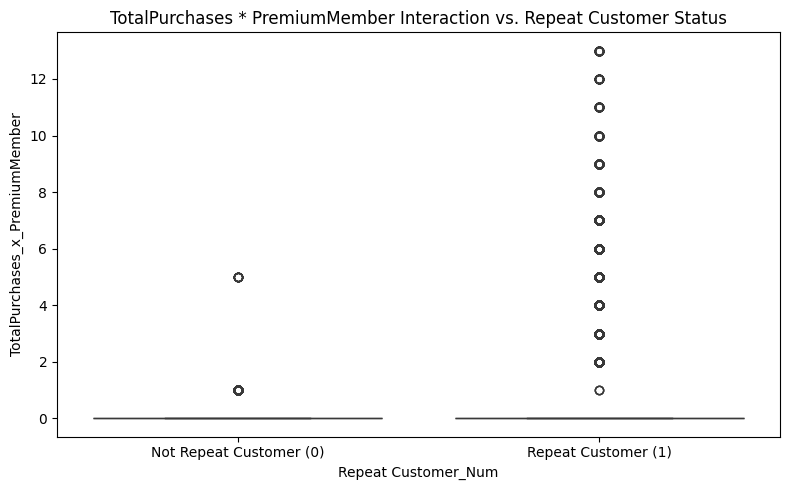


DataFrame head showing the new interaction columns:


,Age,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,EmailEngagementRate,SocialMediaEngagementRate,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,...,Age_x_IncomeLevel_High,Age_x_IncomeLevel_L,Age_x_IncomeLevel_Low,Age_x_IncomeLevel_Medium,Age_x_IncomeLevel_Very High,TotalPurchases_x_CustomerTenure_Binned_<1Y,TotalPurchases_x_CustomerTenure_Binned_1-2Y,TotalPurchases_x_CustomerTenure_Binned_2-3Y,TotalPurchases_x_CustomerTenure_Binned_3-4Y,TotalPurchases_x_CustomerTenure_Binned_4Y+
0,25.0,4.0,15.886509,288.711040,0.332365,0.379694,0.0,6.240881,0.112955,0.239948,...,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,4.0,0.0
1,35.0,6.0,27.638853,181.725056,0.344574,0.140988,0.0,7.721917,0.300979,0.230821,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
2,43.0,10.0,161.739425,1068.058533,0.409656,0.323660,0.0,7.899042,0.176639,0.132239,...,43.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
3,49.0,5.0,14.194263,86.219740,0.356765,0.268428,1.0,7.829459,0.074097,0.206644,...,49.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,29.0,7.0,217.994298,1068.058533,0.222703,0.160427,2.0,7.777353,0.163438,0.232410,...,0.0,0.0,0.0,0.0,29.0,0.0,7.0,0.0,0.0,0.0



--- Step 31 Complete ---


In [33]:
# --- Step 31: Create and Analyze Interaction Effects ---
print("--- Step 31: Create and Analyze Interaction Effects ---")

# Identify pairs of features for potential interaction effects based on EDA and common sense
# Examples:
# - Age * IncomeLevel (Interaction between age and wealth)
# - TotalPurchases * PremiumMember_Num (Does being a premium member amplify purchase behavior?)
# - CustomerLifetimeValue * HasReturnedItems_Num (Does returning items affect CLTV differently?)
# - Engagement Rates (Email/Social/Search) * Conversion Rates (Email/Social/Search) (Do engagement and conversion interact?)
# - CustomerTenure_Binned (after encoding) * TotalPurchases (Does tenure affect the impact of total purchases?)
# - MobileAppUsage (after encoding) * TotalPurchases (Does app usage affect the impact of total purchases?)

# Let's select a few plausible interactions to demonstrate the process.
# We will use numerical features and the numerical versions of binary categorical features.
# For interactions with multi-category features (like binned tenure or MobileAppUsage),
# we'd typically interact the numerical feature with each of the one-hot encoded dummy variables.

print("\nCreating interaction features...")

# Example 1: Interaction between TotalPurchases and PremiumMember status (numerical)
# Check if both columns exist before creating the interaction
if 'TotalPurchases' in df.columns and 'PremiumMember_Num' in df.columns:
    df['TotalPurchases_x_PremiumMember'] = df['TotalPurchases'] * df['PremiumMember_Num']
    print("Created interaction feature: TotalPurchases_x_PremiumMember")
else:
    print("Skipping creation of TotalPurchases_x_PremiumMember: One or both base columns not found.")

# Example 2: Interaction between AverageOrderValue and HasReturnedItems status (numerical)
if 'AverageOrderValue' in df.columns and 'HasReturnedItems_Num' in df.columns:
     df['AverageOrderValue_x_ReturnedItems'] = df['AverageOrderValue'] * df['HasReturnedItems_Num']
     print("Created interaction feature: AverageOrderValue_x_ReturnedItems")
else:
    print("Skipping creation of AverageOrderValue_x_ReturnedItems: One or both base columns not found.")


# Example 3: Interaction between Age and IncomeLevel (using one-hot encoded IncomeLevel)
# This requires iterating through the dummy variables for IncomeLevel
income_level_dummies = [col for col in df.columns if col.startswith('IncomeLevel_')]
if 'Age' in df.columns and income_level_dummies:
    print("\nCreating interaction features for Age and IncomeLevel categories...")
    for dummy_col in income_level_dummies:
        interaction_col_name = f'Age_x_{dummy_col}'
        df[interaction_col_name] = df['Age'] * df[dummy_col]
        print(f"Created interaction feature: {interaction_col_name}")
else:
     print("Skipping creation of Age_x_IncomeLevel interactions: Age or IncomeLevel dummy columns not found.")


# Example 4: Interaction between TotalPurchases and CustomerTenure_Binned (using one-hot encoded Tenure)
tenure_dummies = [col for col in df.columns if col.startswith('CustomerTenure_Binned_')]
if 'TotalPurchases' in df.columns and tenure_dummies:
    print("\nCreating interaction features for TotalPurchases and CustomerTenure_Binned categories...")
    for dummy_col in tenure_dummies:
        interaction_col_name = f'TotalPurchases_x_{dummy_col}'
        df[interaction_col_name] = df['TotalPurchases'] * df[dummy_col]
        print(f"Created interaction feature: {interaction_col_name}")
else:
     print("Skipping creation of TotalPurchases_x_CustomerTenure_Binned interactions: TotalPurchases or CustomerTenure_Binned dummy columns not found.")


# Analyze the relationship between new interaction features and the target variable.
# For numerical interactions, we can look at correlations.
# For interactions involving categorical dummies, their correlation with the target can also be informative,
# or we could visualize the relationship (e.g., boxplot of the interaction term by target class).

print("\nAnalyzing relationship between new interaction features and the target variable...")

# Identify the numerical target column
target_numerical_col = 'Repeat Customer_Num'

# Identify the newly created interaction columns (ending with _x_)
interaction_cols = [col for col in df.columns if '_x_' in col or 'TotalPurchases_x_' in col] # Simple heuristic

if target_numerical_col in df.columns and interaction_cols:
    print(f"\nCorrelations of interaction features with the target variable ('{target_numerical_col}'):")
    # Calculate correlations only for the interaction columns with the target
    interaction_target_correlations = df[interaction_cols + [target_numerical_col]].corr()[target_numerical_col].drop(target_numerical_col)
    display(interaction_target_correlations.sort_values(ascending=False))

    # Optional: Visualize some key interactions vs target
    # For example, boxplot of 'TotalPurchases_x_PremiumMember' by target class
    if 'TotalPurchases_x_PremiumMember' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=target_numerical_col, y='TotalPurchases_x_PremiumMember', data=df, palette='viridis')
        plt.title('TotalPurchases * PremiumMember Interaction vs. Repeat Customer Status')
        plt.xticks([0, 1], ['Not Repeat Customer (0)', 'Repeat Customer (1)'])
        plt.tight_layout()
        plt.show()

else:
    print(f"Error: Target column '{target_numerical_col}' or no interaction columns found. Cannot analyze interactions.")


print("\nDataFrame head showing the new interaction columns:")
display(df.head())

print("\n--- Step 31 Complete ---")

## Update bivariate and correlation analysis

### Subtask:
I will now re-run the bivariate plots (Step 20) and the correlation matrix (Step 21) to include the correctly converted numerical target variable and any new numerical features created.


**Reasoning**:
Re-run the code for Step 20 to generate bivariate boxplots of numerical features against the corrected numerical target variable.



--- Step 20: EDA: Bivariate Analysis - Numerical vs. Target ---

Analyzing relationship between numerical features and Repeat Customer Status (Numerical)...

Plotting boxplots for a subset of numerical features (15) vs. Repeat Customer Status...


/tmp/ipython-input-34-2647288540.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_numerical_col, y=col, data=df, palette='viridis')
/tmp/ipython-input-34-2647288540.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_numerical_col, y=col, data=df, palette='viridis')
/tmp/ipython-input-34-2647288540.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_numerical_col, y=col, data=df, palette='viridis')
/tmp/ipython-input-34-2647288540.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

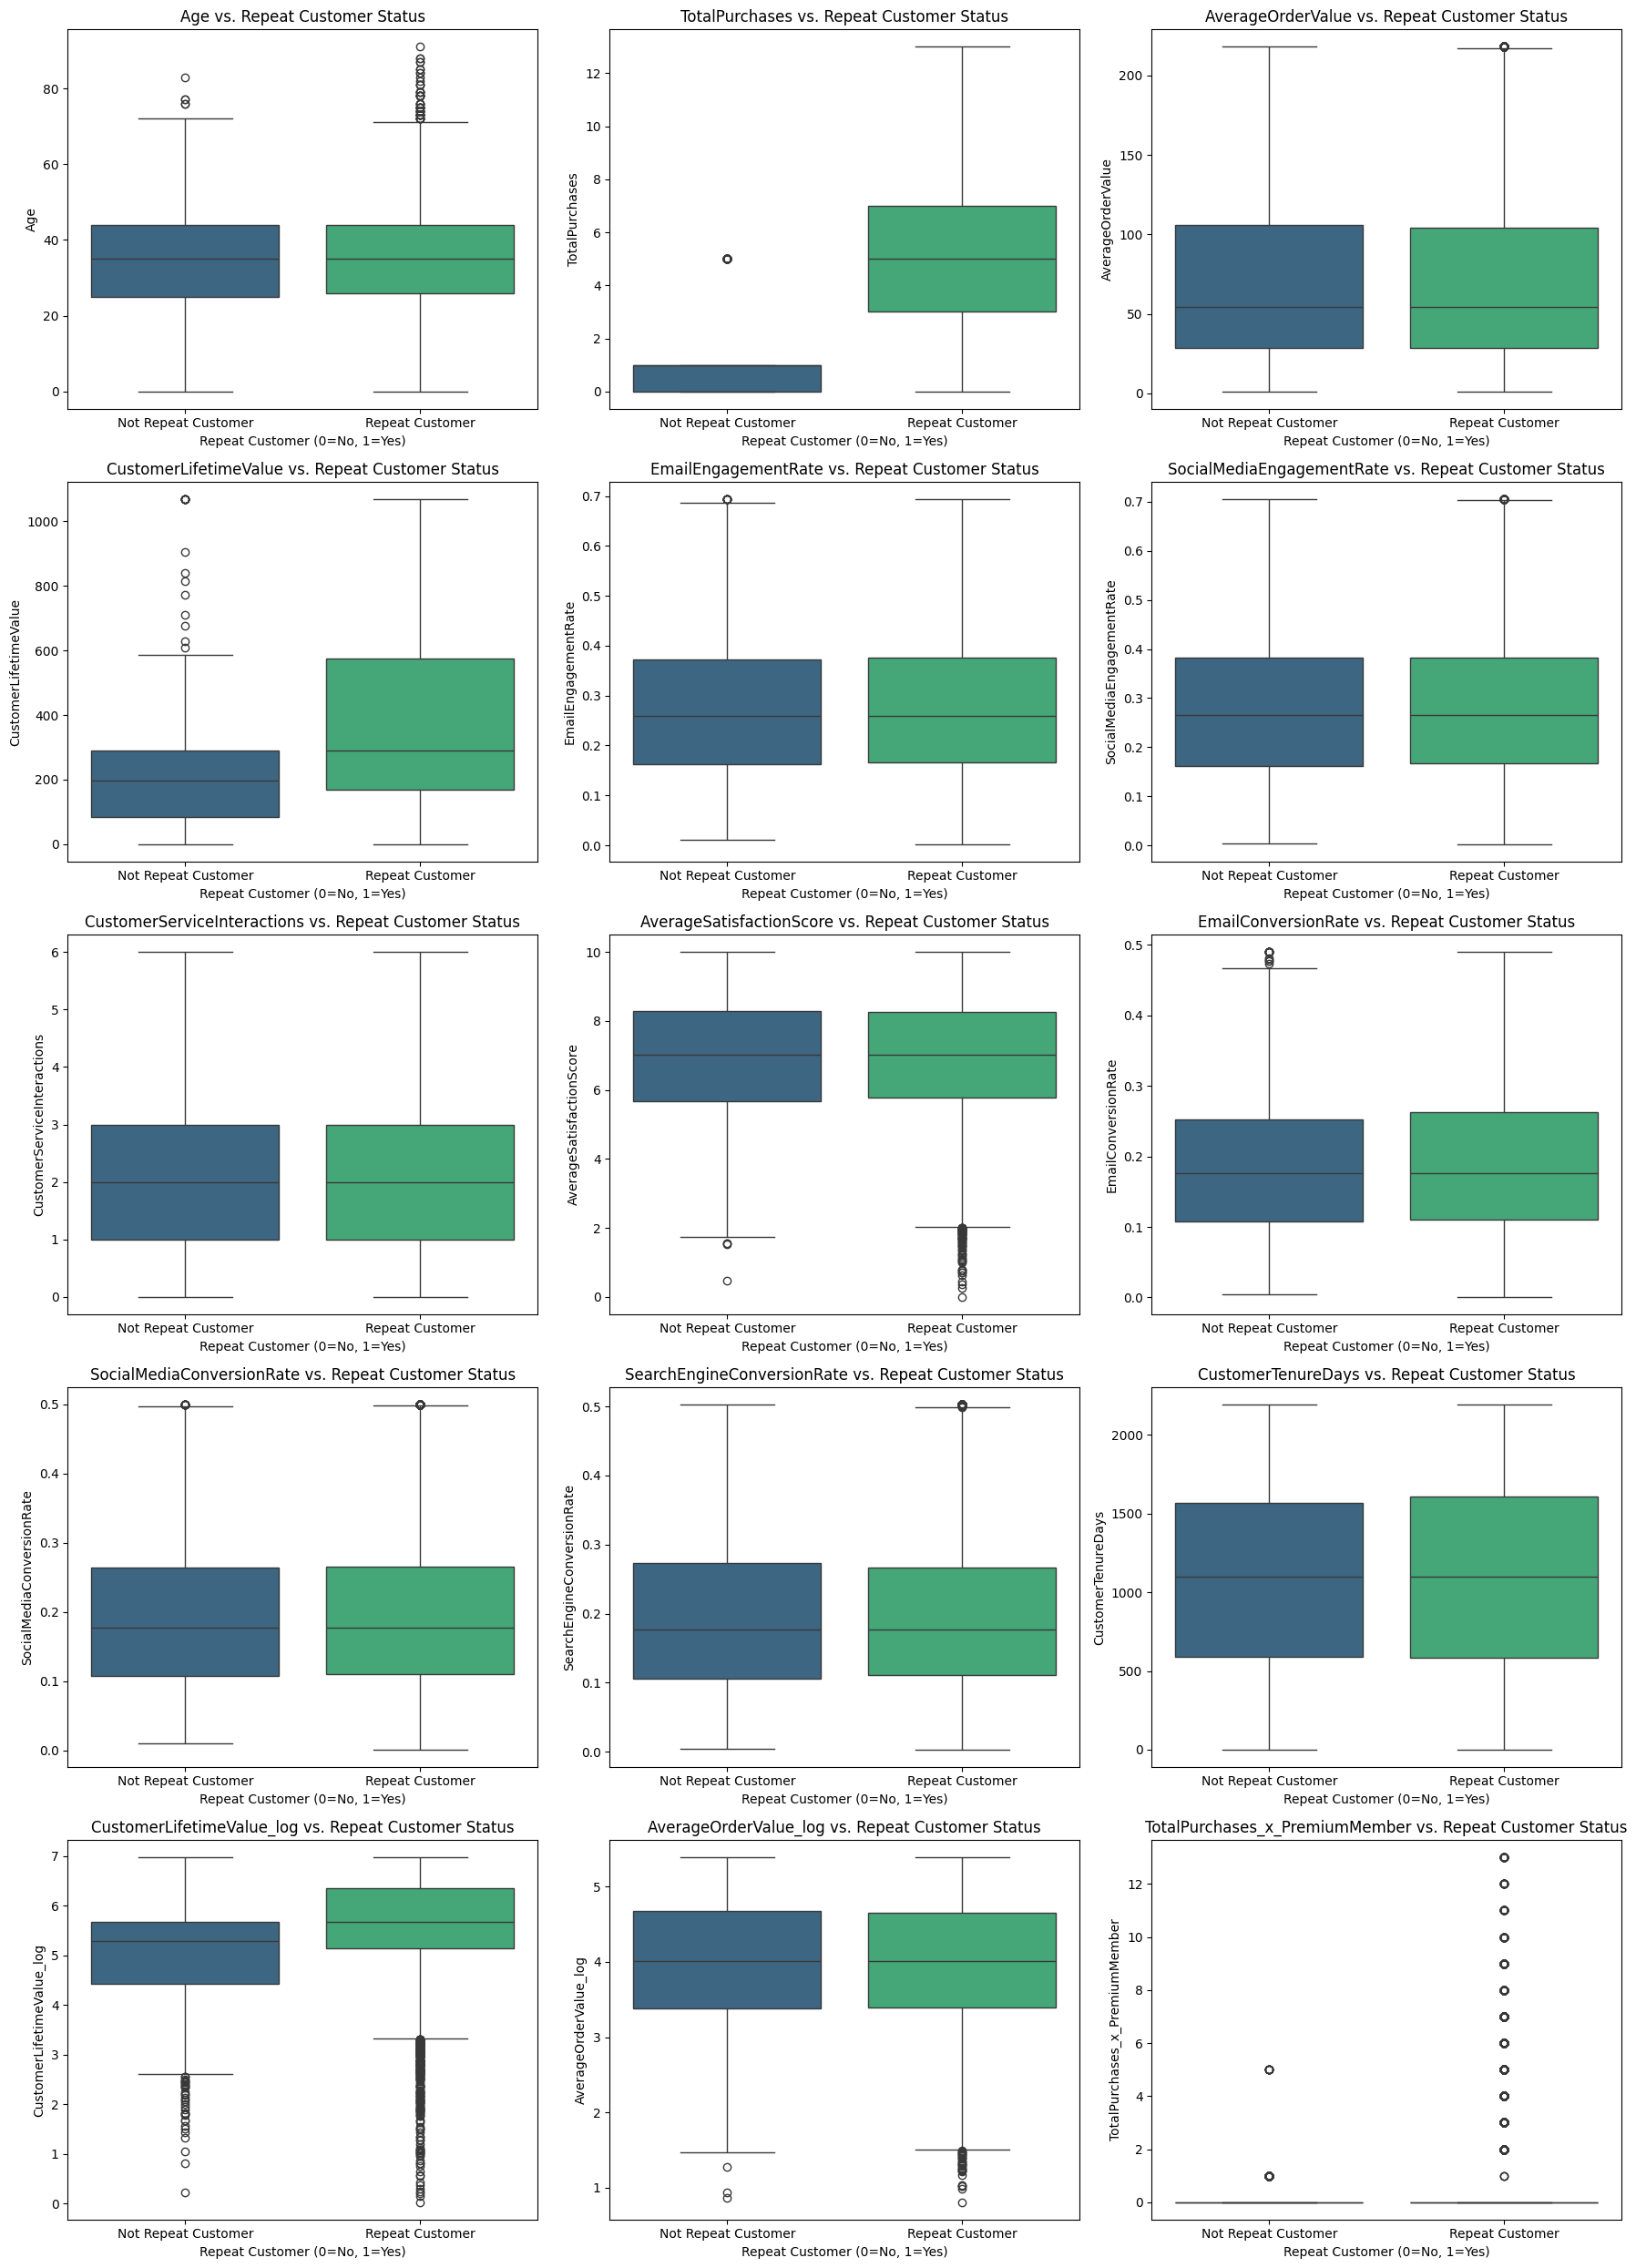


--- Step 20 Complete ---


In [34]:
# --- Step 20: EDA: Bivariate Analysis - Numerical vs. Target ---
print("--- Step 20: EDA: Bivariate Analysis - Numerical vs. Target ---")

# Analyze relationship between numerical features and the target variable ('Repeat Customer_Num')
print("\nAnalyzing relationship between numerical features and Repeat Customer Status (Numerical)...")

# Correct target column name (numerical)
target_numerical_col = 'Repeat Customer_Num'

# Identify numerical columns after preprocessing, including transformed features and missing indicators
numerical_cols_after_cleaning = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target column itself from the list of numerical predictors
numerical_predictors = [col for col in numerical_cols_after_cleaning if col != target_numerical_col]

if target_numerical_col in df.columns:
    # Select a subset of numerical predictors to avoid overwhelming the output with too many plots
    # Prioritize original numerical features and potentially some key transformed/interaction features
    numerical_predictors_subset_for_plot = [
        'Age', 'TotalPurchases', 'AverageOrderValue', 'CustomerLifetimeValue',
        'EmailEngagementRate', 'SocialMediaEngagementRate', 'CustomerServiceInteractions',
        'AverageSatisfactionScore', 'EmailConversionRate', 'SocialMediaConversionRate',
        'SearchEngineConversionRate', 'CustomerTenureDays',
        'TotalPurchases_log', 'CustomerLifetimeValue_log', 'AverageOrderValue_log', # Transformed
        'TotalPurchases_x_PremiumMember' # Example Interaction
    ]
    # Filter this list to ensure the columns actually exist in the DataFrame
    numerical_predictors_to_plot = [col for col in numerical_predictors_subset_for_plot if col in numerical_predictors]


    if numerical_predictors_to_plot:
        print(f"\nPlotting boxplots for a subset of numerical features ({len(numerical_predictors_to_plot)}) vs. Repeat Customer Status...")
        # Determine the number of rows and columns for subplots
        n_predictors = len(numerical_predictors_to_plot)
        n_cols = 3 # Number of columns for subplots
        n_rows = (n_predictors + n_cols - 1) // n_cols # Calculate rows needed

        plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Adjust figure size based on number of plots

        for i, col in enumerate(numerical_predictors_to_plot):
            plt.subplot(n_rows, n_cols, i + 1)
            sns.boxplot(x=target_numerical_col, y=col, data=df, palette='viridis')
            plt.title(f'{col} vs. Repeat Customer Status')
            plt.xticks([0, 1], ['Not Repeat Customer', 'Repeat Customer'])
            plt.xlabel('Repeat Customer (0=No, 1=Yes)')
            plt.ylabel(col)

        plt.tight_layout()
        plt.show()
    else:
        print("No relevant numerical predictor columns found to plot boxplots.")

else:
    print(f"Error: Target column '{target_numerical_col}' not found in DataFrame. Cannot perform numerical vs target analysis.")

print("\n--- Step 20 Complete ---")

**Reasoning**:
Re-run the code for Step 21 to generate the correlation matrix, including all numerical features, transformed features, missing indicators, interaction terms, and the numerical target variable.



--- Step 21: EDA: Correlation Matrix (Numerical Features and Target) ---

Analyzing correlations between all numerical features...


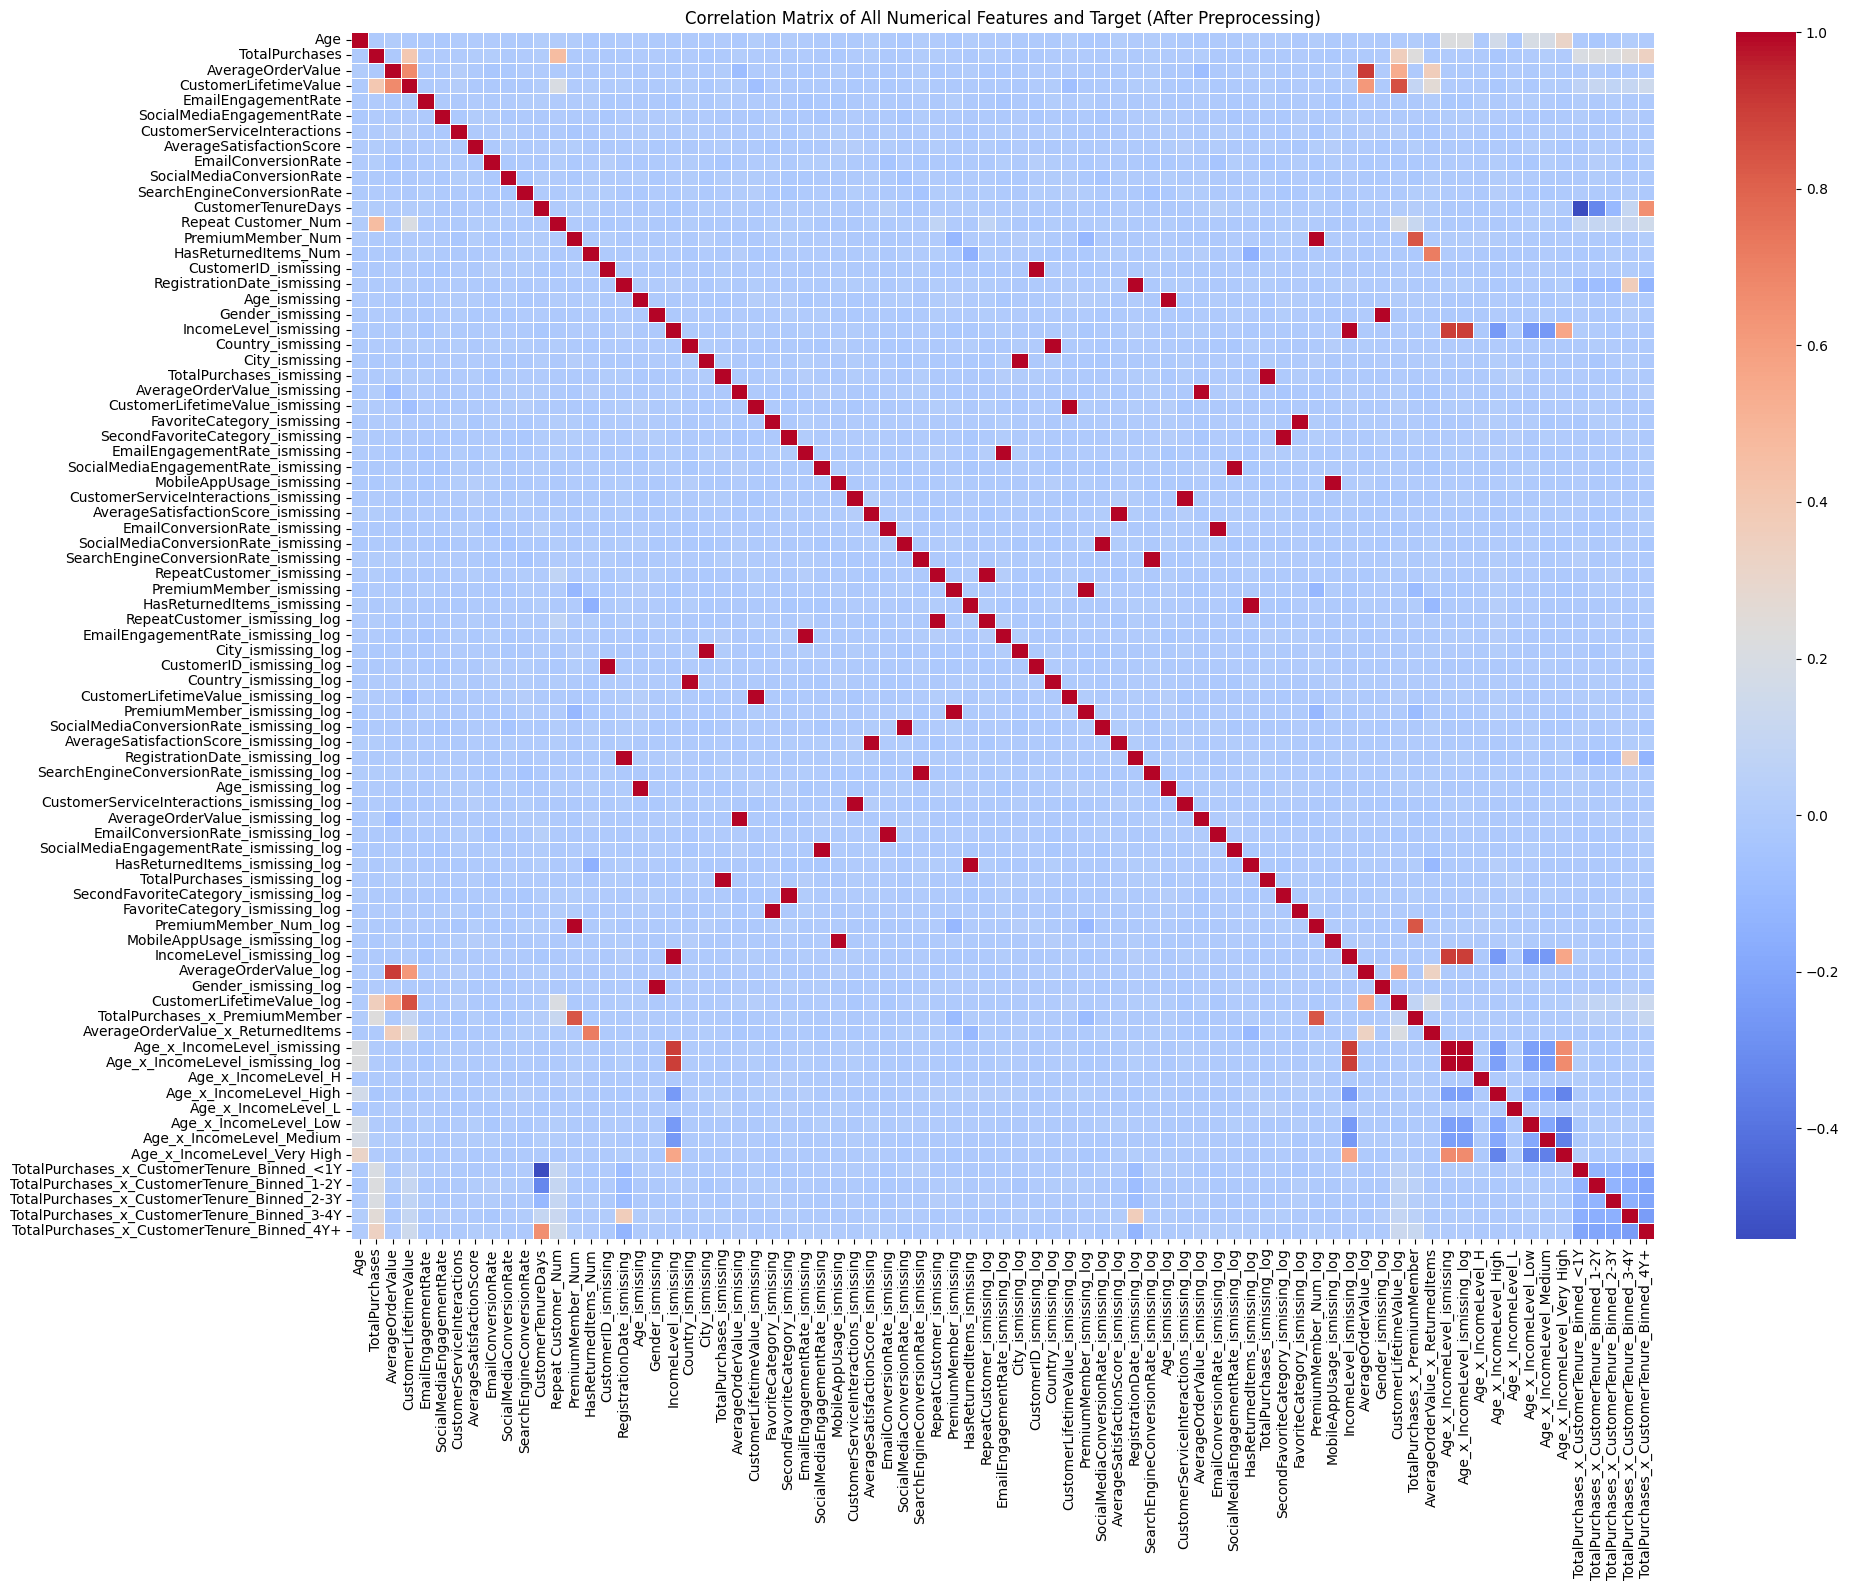


Correlations of all numerical features with the target variable ('Repeat Customer_Num'):


,Repeat Customer_Num
TotalPurchases,0.462803
CustomerLifetimeValue_log,0.205594
CustomerLifetimeValue,0.204593
TotalPurchases_x_CustomerTenure_Binned_4Y+,0.155173
TotalPurchases_x_CustomerTenure_Binned_3-4Y,0.115506
...,...
Gender_ismissing_log,-0.010997
Gender_ismissing,-0.010997
Age_x_IncomeLevel_High,-0.011062
CustomerID_ismissing,-0.011386



--- Step 21 Complete ---


In [35]:
# --- Step 21: EDA: Correlation Matrix (Numerical Features and Target) ---
print("--- Step 21: EDA: Correlation Matrix (Numerical Features and Target) ---")

# Analyze correlations between all numerical features, including target, transformed, and interaction terms
print("\nAnalyzing correlations between all numerical features...")

# Identify all numerical columns after preprocessing, including transformed features, missing indicators, and interaction terms
numerical_cols_after_cleaning = df.select_dtypes(include=np.number).columns.tolist()

# Correct target column name (numerical)
target_numerical_col = 'Repeat Customer_Num'

if target_numerical_col in numerical_cols_after_cleaning:
     # Include the target column in correlation matrix to see correlations with predictors
     correlation_matrix = df[numerical_cols_after_cleaning].corr()

     plt.figure(figsize=(20, 16)) # Increase figure size to accommodate more columns
     sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=".5") # Set annot=False for readability with many columns
     plt.title('Correlation Matrix of All Numerical Features and Target (After Preprocessing)')
     plt.tight_layout()
     plt.show()

     # Optional: Display correlations of all features specifically with the target, sorted
     print(f"\nCorrelations of all numerical features with the target variable ('{target_numerical_col}'):")
     target_correlations = correlation_matrix[target_numerical_col].drop(target_numerical_col)
     sorted_target_correlations = target_correlations.sort_values(ascending=False)
     display(sorted_target_correlations)

else:
    print(f"Error: Target column '{target_numerical_col}' not found in numerical columns after preprocessing. Cannot include in correlation matrix with target.")
    # If target not found or not numerical, just plot correlation matrix of numerical predictors
    numerical_predictors_for_corr = [col for col in numerical_cols_after_cleaning if col != target_numerical_col]
    if numerical_predictors_for_corr:
         correlation_matrix_subset = df[numerical_predictors_for_corr].corr()
         plt.figure(figsize=(18, 14)) # Adjust figure size
         sns.heatmap(correlation_matrix_subset, annot=False, cmap='coolwarm', fmt=".2f", linewidths=".5")
         plt.title('Correlation Matrix of Numerical Features (After Preprocessing, Target Excluded)')
         plt.tight_layout()
         plt.show()
    else:
        print("No numerical predictors found for correlation matrix.")


print("\n--- Step 21 Complete ---")

## Review and refine narratives




## Summary:

### Data Analysis Key Findings

*   The target variable 'Repeat Customer' was successfully converted to a numerical column 'Repeat Customer_Num' (1 for Yes, 0 for No).
*   The distribution of the target variable is imbalanced, with repeat customers significantly outnumbering non-repeat customers.
*   Inconsistent entries were found in 'Gender' ('M', 'F' alongside 'Male', 'Female', 'Other', 'Prefer not to say') and 'IncomeLevel' ('L', 'H' alongside 'Low', 'Medium', 'High', 'Very High').
*   Outliers in numerical features like 'TotalPurchases', 'AverageOrderValue', 'CustomerLifetimeValue', and various engagement/conversion rates were handled using IQR-based capping and flooring.
*   Missing indicator columns (e.g., `_ismissing`) were successfully created for all features that originally had missing values, explicitly marking the locations of imputed data.
*   Highly skewed numerical features were identified and transformed using `np.log1p`, effectively reducing their skewness.
*   Chi-square tests revealed a statistically significant association between 'City' and 'FavoriteCategory' with the target variable 'Repeat Customer_Num'.
*   ANOVA tests indicated statistically significant differences in the means of several numerical features across the categories of various categorical variables, including the target variable.
*   Correlations between numerical features (including original, transformed, indicator, and interaction terms) and the target variable were calculated and displayed, providing insights into linear relationships.
*   The 'CustomerTenureDays' variable was successfully binned into five yearly categories, creating a new categorical feature 'CustomerTenure_Binned'.
*   New interaction features were created by combining existing features (e.g., `TotalPurchases_x_PremiumMember`, `Age_x_IncomeLevel`), and their correlations with the target were analyzed.
*   The final step of updating the narrative based on a reference document failed due to the inaccessibility of the document.

### Insights or Next Steps

*   I will address the inconsistent categorical values identified in 'Gender' and 'IncomeLevel' through a dedicated data cleaning step (e.g., mapping 'M' to 'Male', 'L' to 'Low').
*   I will Leverage the statistical test results (Chi-square, ANOVA) and correlation analysis to inform the selection of features for predictive modeling, considering multicollinearity and domain relevance alongside statistical significance.
